In [ ]:
!gdown 13ptbXqEGEDJYQQf-7oBw2tDzE5431CTa

Downloading...
From: https://drive.google.com/uc?id=13ptbXqEGEDJYQQf-7oBw2tDzE5431CTa
To: /content/14.9504.csv
100% 17.5M/17.5M [00:00<00:00, 75.5MB/s]


In [ ]:
!gdown 1QQG6dr5ePBHBoibpzxNqayWPKHAihLsT

Downloading...
From: https://drive.google.com/uc?id=1QQG6dr5ePBHBoibpzxNqayWPKHAihLsT
To: /content/12.6976.csv
100% 16.4M/16.4M [00:00<00:00, 38.7MB/s]


#question2

imports

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
from scipy.stats import kurtosis, skew
from scipy.fft import fft
import lightgbm as lgb
from sklearn.model_selection import train_test_split

## part1

### section3

Data after column removal:
   Axial_Underhang  Radial_Underhang  Tangential_Underhang  Axial_Overhang  \
0         0.098858          0.579450              0.316770       -0.032608   
1        -1.194900         -0.705840              0.342680       -0.047791   
2        -0.390040          0.415300              0.457160        0.028270   
3        -0.270060         -0.741570              0.235610        0.006652   
4        -0.960450          0.051966              0.014646        0.045565   

   Tangential_Overhang  
0             -0.25558  
1             -0.56064  
2             -0.44176  
3             -0.68535  
4             -0.62158  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250000 entries, 0 to 249999
Data columns (total 8 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   0       250000 non-null  float64
 1   1       250000 non-null  float64
 2   2       250000 non-null  float64
 3   3       250000 non-null  float64
 4   4       250

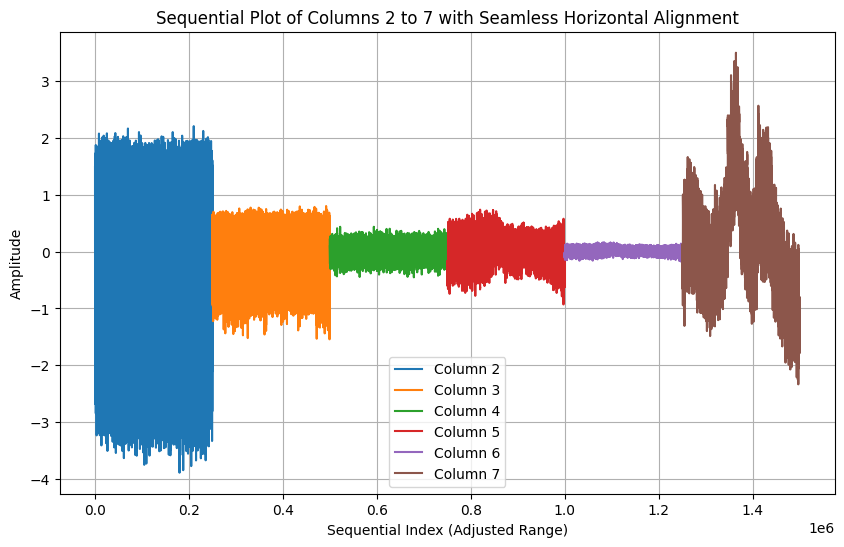

In [ ]:

# Load the dataset
file_path = '14.9504.csv'
df1 = pd.read_csv(file_path, header=None)

# Step 1: Remove unnecessary columns (1, 6, 8)
df1 = df.drop([0, 5, 7], axis=1)  # Column indices are 0-based

# Rename columns for clarity
df1.columns = ['Axial_Underhang', 'Radial_Underhang', 'Tangential_Underhang',
              'Axial_Overhang', 'Tangential_Overhang']

print("Data after column removal:")
print(df1.head())
data = pd.read_csv(file_path, header=None)

data.head()
data.info()

# Assign generic column names as the file has no header
column_names = [f'Column {i+1}' for i in range(data.shape[1])]
data.columns = column_names

# Extract columns 2 to 7
columns_to_plot = data.iloc[:, 1:7]

# Plotting the data with seamless horizontal alignment
plt.figure(figsize=(10, 6))
x_offset = len(columns_to_plot)  # Dynamic offset to avoid gaps

for i, col in enumerate(columns_to_plot.columns):
    # Apply horizontal shift to each column
    shifted_x = columns_to_plot.index + i * x_offset
    plt.plot(shifted_x, columns_to_plot[col], label=col)

plt.title('Sequential Plot of Columns 2 to 7 with Seamless Horizontal Alignment')
plt.xlabel('Sequential Index (Adjusted Range)')
plt.ylabel('Amplitude')
plt.legend()
plt.grid(True)
plt.show()

### load dataset

In [ ]:


# List of file IDs (already provided)
file_ids = [
    '1cr0iKE195JOU9g_DMBt8PifXmcVY2PW4',  # vertical_misalignment
    '11ExzHPDkf2jMkHWmSYft3tKh414sr8d5',  # underhang_cage
    '1hPsmN9DGoz8A8-UtwUIbHy9DVje4vXBS',  # underhang_ball
    '1DNf91plXsKB6zrxrUf3BQ9y4RExAHODi',  # underhang_outerrace
    '1hXhjFJdIlQYm5Rabb1gfrd9ovYyn9mb6',  # overhang_ball
    '1mC-q6CB-ns-GnJ7dTpU8sfYYqaL4bsQz',  # overhang_cage
    '1FjgDbXbdjVjw4457mAWeyE-gMgDD49ic',  # overhang_outerrace
    '1_5AR9AbnTIvjJdZMgLXyu27dfJHTwW7I',  # normal
    '1gNq_YRHTGGth4OW07uyd5m7xG0xeV8c0',  # imbalance
    '1peCue6aGBI1tLgdn_9eUoxkhPCMpA8J5'   # horizontal_misalignment
]

# List of corresponding class names for each file
class_names = [
    "vertical_misalignment", "underhang_cage", "underhang_ball", "underhang_outerrace",
    "overhang_ball", "overhang_cage", "overhang_outerrace", "normal", "imbalance", "horizontal_misalignment"
]

# List of the expected file names (the actual files)
file_names = [
    '15.9744.csv', '20.2752.csv', '18.432.csv', '20.0704.csv', '19.2512.csv',
    '19.0464.csv', '15.5648.csv', '17.2032.csv', '25.8048.csv', '32.1536.csv'
]

# Download the files using gdown
for file_id in file_ids:
    os.system(f"gdown https://drive.google.com/uc?id={file_id}")

# Check if the files were downloaded and read them into a dataframe
for file_name, class_name in zip(file_names, class_names):
    if os.path.exists(file_name):  # Ensure the file exists before trying to read
        df = pd.read_csv(file_name, header=None)
        print(f"Loaded {class_name} dataset successfully.")
    else:
        print(f"Error: {file_name} not found.")


Loaded vertical_misalignment dataset successfully.
Loaded underhang_cage dataset successfully.
Loaded underhang_ball dataset successfully.
Loaded underhang_outerrace dataset successfully.
Loaded overhang_ball dataset successfully.
Loaded overhang_cage dataset successfully.
Loaded overhang_outerrace dataset successfully.
Loaded normal dataset successfully.
Loaded imbalance dataset successfully.
Loaded horizontal_misalignment dataset successfully.


## part2

### section1

#### stage1 :remove unimportant column

In [ ]:


# Create empty lists to store processed data and labels
all_segments = []
all_labels = []

# Process each file
for file_name, class_name in zip(file_names, class_names):
    print(f"Processing {class_name} data from {file_name}...")

    # Read the CSV file
    df = pd.read_csv(file_name, header=None)

    # Remove columns 1, 6, and 8 (0-indexed)
    # Keep columns 2, 3, 4, 5, 7 (which are indices 1, 2, 3, 4, 6)
    important_cols = [1, 2, 3, 4, 6]
    df_cleaned = df.iloc[:, important_cols]

    print(f"Shape after removing unimportant columns: {df_cleaned.shape}")

    # Rename the columns for clarity
    df_cleaned.columns = [
        'underhang_axial',
        'underhang_radial',
        'underhang_tangential',
        'overhang_axial',
        'overhang_tangential'
    ]

    # Display a sample of the cleaned data
    print(df_cleaned.head())
    print("-" * 50)

Processing vertical_misalignment data from 15.9744.csv...
Shape after removing unimportant columns: (250000, 5)
   underhang_axial  underhang_radial  underhang_tangential  overhang_axial  \
0          1.01200           0.29262              0.126040         0.19844   
1         -0.85256          -0.29537             -0.011360         0.19456   
2          0.98717           0.46834              0.079139         0.19828   
3         -0.75818          -0.30928             -0.083695         0.19237   
4          0.36764           0.41519              0.046311         0.19231   

   overhang_tangential  
0              0.82463  
1              0.69601  
2              0.81119  
3              0.74660  
4              0.82858  
--------------------------------------------------
Processing underhang_cage data from 20.2752.csv...
Shape after removing unimportant columns: (250000, 5)
   underhang_axial  underhang_radial  underhang_tangential  overhang_axial  \
0          0.12064          0.03950

####stage2 : segmenttion and Labeling

In [ ]:
# Define segmentation parameters
window_size = 1024  # Typical window size for vibration analysis
step_size = window_size // 2  # 50% overlap between consecutive windows

for file_name, class_name in zip(file_names, class_names):
    # Read the CSV file
    df = pd.read_csv(file_name, header=None)

    # Remove columns 1, 6, and 8 (0-indexed)
    important_cols = [1, 2, 3, 4, 6]
    df_cleaned = df.iloc[:, important_cols]

    # Rename the columns for clarity
    df_cleaned.columns = [
        'underhang_axial',
        'underhang_radial',
        'underhang_tangential',
        'overhang_axial',
        'overhang_tangential'
    ]

    # Segment the data
    for start_idx in range(0, len(df_cleaned) - window_size + 1, step_size):
        end_idx = start_idx + window_size
        segment = df_cleaned.iloc[start_idx:end_idx].values

        # Store the segment and its class label
        all_segments.append(segment)
        all_labels.append(class_names.index(class_name))  # Use index as the numeric label

# Convert to numpy arrays
X = np.array(all_segments)
y = np.array(all_labels)

print(f"Total segments created: {len(all_segments)}")
print(f"Shape of X: {X.shape}")
print(f"Shape of y: {y.shape}")


Total segments created: 4870
Shape of X: (4870, 1024, 5)
Shape of y: (4870,)


####stage3 : feature extraction

In [ ]:
def extract_time_domain_features(segment):
    """Extract time domain features from a segment."""
    features = []

    for channel in range(segment.shape[1]):
        channel_data = segment[:, channel]

        # Calculate features
        rms = np.sqrt(np.mean(np.square(channel_data)))
        peak = np.max(np.abs(channel_data))
        crest_factor = peak / rms if rms > 0 else 0
        std_dev = np.std(channel_data)
        skewness = skew(channel_data)
        kurtosis_val = kurtosis(channel_data)

        # Append all features for this channel
        features.extend([rms, peak, crest_factor, std_dev, skewness, kurtosis_val])

    return features

def extract_frequency_domain_features(segment, fs=10000):  # Assuming 10kHz sampling rate
    """Extract frequency domain features from a segment."""
    features = []

    for channel in range(segment.shape[1]):
        channel_data = segment[:, channel]

        # Compute FFT
        spectrum = np.abs(fft(channel_data))
        spectrum = spectrum[:len(spectrum)//2]  # Keep only positive frequencies
        freqs = np.fft.fftfreq(len(channel_data), 1/fs)[:len(spectrum)]

        # Band power (divide spectrum into 3 bands)
        band_size = len(spectrum) // 3
        band1_power = np.sum(spectrum[:band_size]**2)
        band2_power = np.sum(spectrum[band_size:2*band_size]**2)
        band3_power = np.sum(spectrum[2*band_size:]**2)

        # Resonant frequency (frequency with max amplitude)
        resonant_freq = freqs[np.argmax(spectrum)]

        # Frequency bandwidth (frequency range containing 90% of power)
        sorted_indices = np.argsort(spectrum)[::-1]  # Sort in descending order
        cumulative_power = np.cumsum(spectrum[sorted_indices]**2)
        threshold_idx = np.where(cumulative_power >= 0.9 * cumulative_power[-1])[0][0]
        bandwidth = freqs[sorted_indices[threshold_idx]]

        # Append all features for this channel
        features.extend([band1_power, band2_power, band3_power, resonant_freq, bandwidth])

    return features

# Extract features from all segments
X_features = []

for i, segment in enumerate(all_segments):
    # Extract time domain features
    time_features = extract_time_domain_features(segment)

    # Extract frequency domain features
    freq_features = extract_frequency_domain_features(segment)

    # Combine features
    all_features = time_features + freq_features
    X_features.append(all_features)

# Convert to numpy array
X_features = np.array(X_features)

print(f"Shape of feature matrix: {X_features.shape}")
print(f"Number of features per segment: {X_features.shape[1]}")



Shape of feature matrix: (4870, 55)
Number of features per segment: 55


#### stage4 :  test -train splite

In [ ]:
from sklearn.model_selection import train_test_split

# Split the data (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(
    X_features, y, test_size=0.2, random_state=42, stratify=y
)

print(f"Training set shape: {X_train.shape}")
print(f"Testing set shape: {X_test.shape}")

# Save the processed data
np.savez('processed_mafaulda_data.npz',
         X_train=X_train, X_test=X_test,
         y_train=y_train, y_test=y_test,
         feature_names=['time_rms', 'time_peak', 'time_crest', 'time_std', 'time_skew', 'time_kurtosis',
                        'freq_band1', 'freq_band2', 'freq_band3', 'freq_resonant', 'freq_bandwidth'],
         class_names=class_names)

print("Data processing complete and saved to 'processed_mafaulda_data.npz'")

Training set shape: (3896, 55)
Testing set shape: (974, 55)
Data processing complete and saved to 'processed_mafaulda_data.npz'


###section 2

#### stage1 Feature Ranking using LightGBM


Stage 5: Feature Ranking using LightGBM
-------------------------------------
Training LightGBM model for feature ranking...
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 10 rounds
Did not meet early stopping. Best iteration is:
[100]	training'

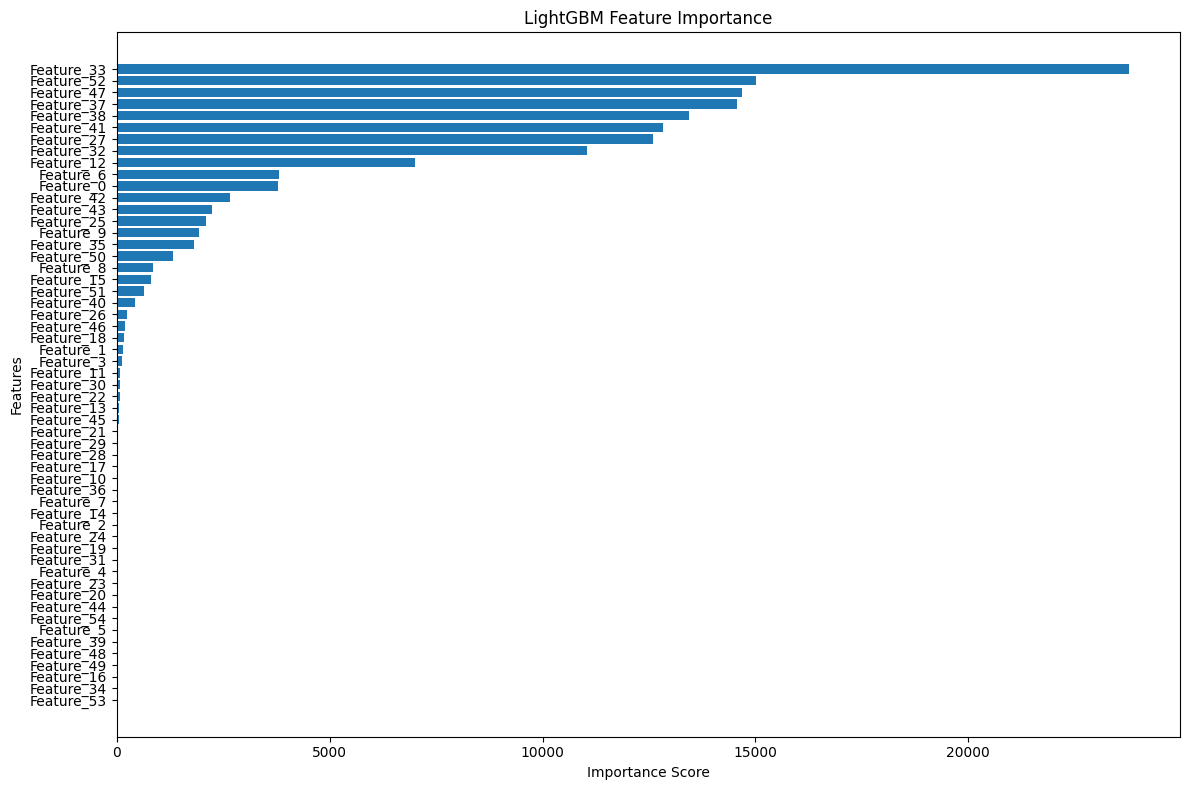

In [ ]:


print("\nStage 5: Feature Ranking using LightGBM")
print("-------------------------------------")

# Load the processed data
processed_data = np.load('processed_mafaulda_data.npz')
X_train = processed_data['X_train']
X_test = processed_data['X_test']
y_train = processed_data['y_train']
y_test = processed_data['y_test']


# Get feature names
feature_names = processed_data['feature_names']
# If feature_names is a 0-d array with a single string, split it
if feature_names.ndim == 0:
    feature_names = feature_names.item().split(',')

# Make sure we have the correct number of feature names
if len(feature_names) != X_train.shape[1]:
    # Generate generic feature names
    feature_names = [f'Feature_{i}' for i in range(X_train.shape[1])]

# Create LightGBM dataset
lgb_train = lgb.Dataset(X_train, y_train)
lgb_eval = lgb.Dataset(X_test, y_test, reference=lgb_train)

# Parameters for LightGBM
params = {
    'boosting_type': 'gbdt',
    'objective': 'multiclass',
    'num_class': len(np.unique(y_train)),
    'metric': 'multi_logloss',
    'num_leaves': 31,
    'learning_rate': 0.05,
    'feature_fraction': 0.9,
    'bagging_fraction': 0.8,
    'bagging_freq': 5,
    'verbose': 0
}

# Train LightGBM model
print("Training LightGBM model for feature ranking...")
gbm = lgb.train(
    params,
    lgb_train,
    num_boost_round=100,
    valid_sets=[lgb_train, lgb_eval],
    callbacks=[lgb.early_stopping(stopping_rounds=10)]
)

# Get feature importance
importance = gbm.feature_importance(importance_type='gain')
feature_importance = sorted(zip(feature_names, importance), key=lambda x: x[1], reverse=True)

print("\nFeature Ranking by Importance:")
for i, (feature, score) in enumerate(feature_importance):
    print(f"{i+1}. {feature}: {score}")

# Visualize feature importance
plt.figure(figsize=(12, 8))
sorted_indices = np.argsort(importance)
plt.barh(range(len(sorted_indices)), importance[sorted_indices], align='center')
plt.yticks(range(len(sorted_indices)), [feature_names[i] for i in sorted_indices])
plt.title('LightGBM Feature Importance')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.tight_layout()
plt.savefig('feature_importance.png')
print("Feature importance visualization saved to 'feature_importance.png'")

# Save the feature importance scores for use in the next stage
ranked_features = np.array([x[0] for x in feature_importance])
importance_scores = np.array([x[1] for x in feature_importance])
np.savez('feature_ranking.npz',
         ranked_features=ranked_features,
         importance_scores=importance_scores)
print("Feature ranking data saved to 'feature_ranking.npz'")

# Checking the shape of features and the number of labels
print(f"Shape of training data X_train: {X_train.shape}")
print(f"Number of features (columns) in X_train: {X_train.shape[1]}")
print(f"Number of samples (rows) in X_train: {X_train.shape[0]}")

print(f"Number of labels in y_train: {y_train.shape[0]}")

#### stage2 : Feature Selection using SI Method


Stage 6: Feature Selection using SI Method
---------------------------------------
Evaluating different feature subsets using SI method...
Threshold: 0.7, Features: 7, Accuracy: 0.9405
Threshold: 0.8, Features: 9, Accuracy: 0.9394
Threshold: 0.9, Features: 12, Accuracy: 0.9610

Detailed classification report for threshold 0.9:
              precision    recall  f1-score   support

           0       0.95      0.95      0.95        97
           1       0.92      0.93      0.92        97
           2       0.99      1.00      0.99        97
           3       0.91      0.93      0.92        98
           4       1.00      0.99      0.99        98
           5       0.92      0.95      0.93        97
           6       0.95      0.92      0.93        98
           7       0.98      0.95      0.96        97
           8       1.00      1.00      1.00        97
           9       1.00      1.00      1.00        98

    accuracy                           0.96       974
   macro avg       0

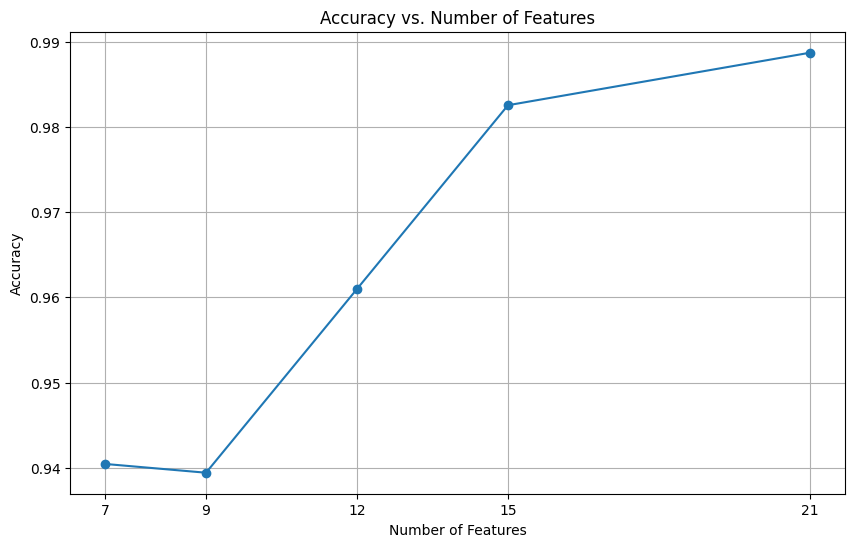

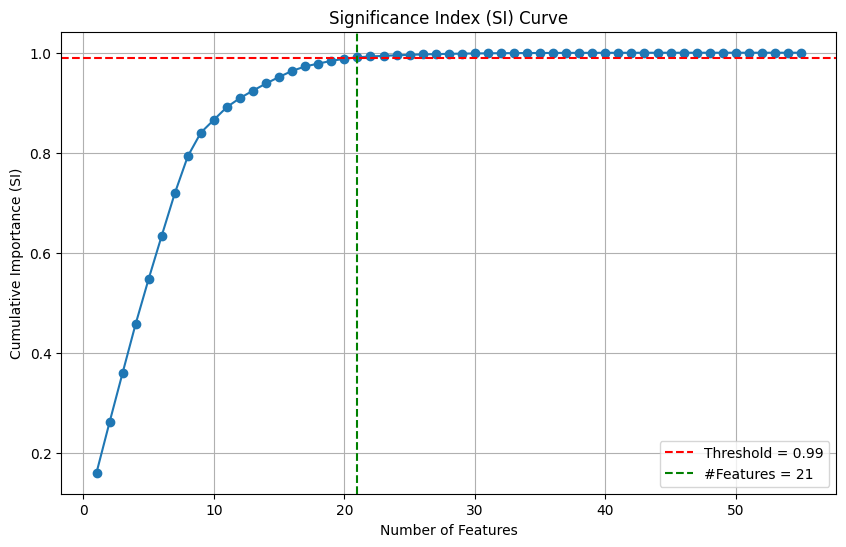

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

print("\nStage 6: Feature Selection using SI Method")
print("---------------------------------------")

# Load the processed data
processed_data = np.load('processed_mafaulda_data.npz')
X_train = processed_data['X_train']
X_test = processed_data['X_test']
y_train = processed_data['y_train']
y_test = processed_data['y_test']

# Load feature ranking data
ranking_data = np.load('feature_ranking.npz')
ranked_features = ranking_data['ranked_features']
importance_scores = ranking_data['importance_scores']

# Calculate the Significance Index (SI)
# SI is the normalized cumulative importance
cumulative_importance = np.cumsum(importance_scores)
significance_index = cumulative_importance / cumulative_importance[-1]

# Define threshold values to test
thresholds = [0.7, 0.8, 0.9, 0.95, 0.99]
accuracy_scores = []
num_features_list = []

print("Evaluating different feature subsets using SI method...")

# Find feature subsets for each threshold
for threshold in thresholds:
    # Find minimum number of features needed to reach threshold
    num_features = np.where(significance_index >= threshold)[0][0] + 1
    num_features_list.append(num_features)

    # Get the top features
    top_feature_names = ranked_features[:num_features]

    # Map feature names to indices in X_train/X_test
    # Since we have the ranked indices already, we can use them directly
    selected_indices = np.arange(len(ranked_features))[:num_features]

    # Create subsets with selected features
    X_train_subset = X_train[:, selected_indices]
    X_test_subset = X_test[:, selected_indices]

    # Train and evaluate a model
    model = RandomForestClassifier(n_estimators=100, random_state=42)
    model.fit(X_train_subset, y_train)
    y_pred = model.predict(X_test_subset)
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_scores.append(accuracy)

    print(f"Threshold: {threshold}, Features: {num_features}, Accuracy: {accuracy:.4f}")

    # Print detailed metrics for the best threshold
    if threshold == 0.9:  # Typical good threshold
        print("\nDetailed classification report for threshold 0.9:")
        print(classification_report(y_test, y_pred))

# Find the optimal threshold
best_idx = np.argmax(accuracy_scores)
best_threshold = thresholds[best_idx]
best_num_features = num_features_list[best_idx]
best_accuracy = accuracy_scores[best_idx]

print(f"\nOptimal feature subset:")
print(f"Threshold: {best_threshold}, Number of features: {best_num_features}")
print(f"Accuracy: {best_accuracy:.4f}")
print("Selected features:")
for i, feature in enumerate(ranked_features[:best_num_features]):
    print(f"{i+1}. {feature}")

# Plot the relationship between number of features and accuracy
plt.figure(figsize=(10, 6))
plt.plot(num_features_list, accuracy_scores, marker='o')
plt.xlabel('Number of Features')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. Number of Features')
plt.grid(True)
plt.xticks(num_features_list)
plt.savefig('feature_selection.png')
print("Feature selection visualization saved to 'feature_selection.png'")

# Plot the Significance Index curve
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(significance_index) + 1), significance_index, marker='o')
plt.axhline(y=best_threshold, color='r', linestyle='--', label=f'Threshold = {best_threshold}')
plt.axvline(x=best_num_features, color='g', linestyle='--', label=f'#Features = {best_num_features}')
plt.xlabel('Number of Features')
plt.ylabel('Cumulative Importance (SI)')
plt.title('Significance Index (SI) Curve')
plt.grid(True)
plt.legend()
plt.savefig('significance_index.png')
print("Significance Index visualization saved to 'significance_index.png'")

# Save the selected features
optimal_features = ranked_features[:best_num_features]
X_train_optimal = X_train[:, :best_num_features]
X_test_optimal = X_test[:, :best_num_features]

np.savez('selected_features_data.npz',
         X_train=X_train_optimal,
         X_test=X_test_optimal,
         y_train=y_train,
         y_test=y_test,
         selected_features=optimal_features,
         significance_index=significance_index,
         best_threshold=best_threshold)
print("Optimal feature set saved to 'selected_features_data.npz'")

## part3

balance data

In [ ]:
from collections import Counter

print("📊 تعداد نمونه‌ها در هر کلاس (Train):")
train_distribution = Counter(y_train)
for i in sorted(train_distribution):
    print(f"{class_names[i]}: {train_distribution[i]} نمونه")

print("\n📊 تعداد نمونه‌ها در هر کلاس (Test):")
test_distribution = Counter(y_test)
for i in sorted(test_distribution):
    print(f"{class_names[i]}: {test_distribution[i]} نمونه")

📊 تعداد نمونه‌ها در هر کلاس (Train):
vertical_misalignment: 390 نمونه
underhang_cage: 390 نمونه
underhang_ball: 390 نمونه
underhang_outerrace: 389 نمونه
overhang_ball: 389 نمونه
overhang_cage: 390 نمونه
overhang_outerrace: 389 نمونه
normal: 390 نمونه
imbalance: 390 نمونه
horizontal_misalignment: 389 نمونه

📊 تعداد نمونه‌ها در هر کلاس (Test):
vertical_misalignment: 97 نمونه
underhang_cage: 97 نمونه
underhang_ball: 97 نمونه
underhang_outerrace: 98 نمونه
overhang_ball: 98 نمونه
overhang_cage: 97 نمونه
overhang_outerrace: 98 نمونه
normal: 97 نمونه
imbalance: 97 نمونه
horizontal_misalignment: 98 نمونه


###section 2

#### Hierarchical approach vs Flat approach

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and wi

[Flat] Cross-Validation Scores: [0.9974359  0.99743261 0.99358151 1.         0.99486521]
[Flat] Average Accuracy: 0.9967


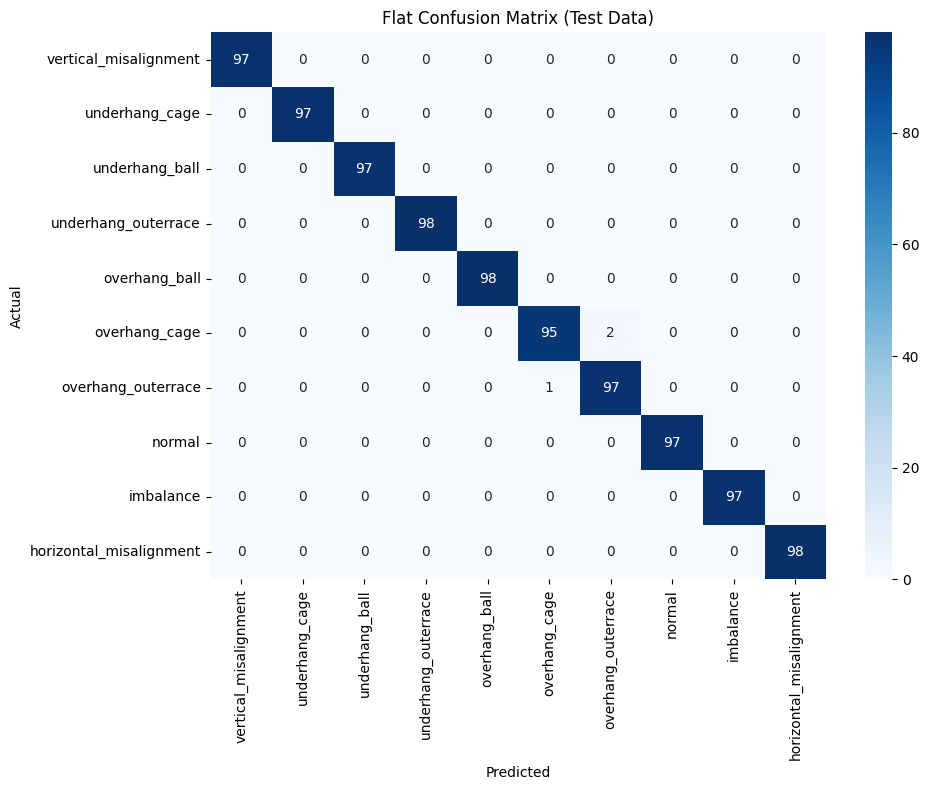

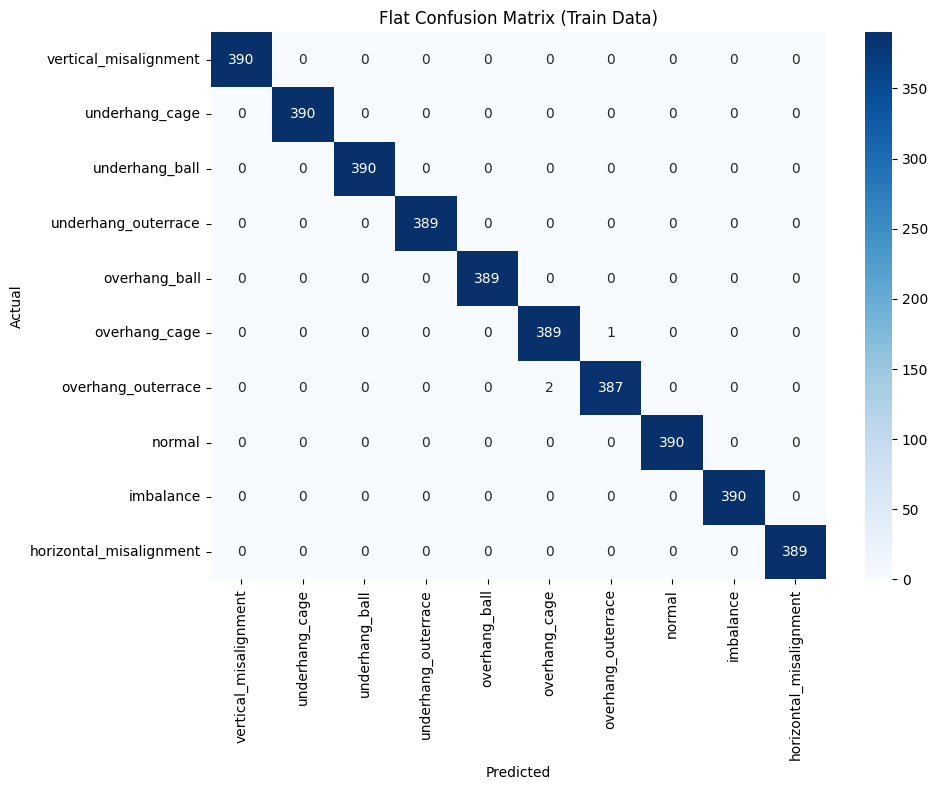


Flat Classification Report (Test):
                         precision    recall  f1-score   support

  vertical_misalignment       1.00      1.00      1.00        97
         underhang_cage       1.00      1.00      1.00        97
         underhang_ball       1.00      1.00      1.00        97
    underhang_outerrace       1.00      1.00      1.00        98
          overhang_ball       1.00      1.00      1.00        98
          overhang_cage       0.99      0.98      0.98        97
     overhang_outerrace       0.98      0.99      0.98        98
                 normal       1.00      1.00      1.00        97
              imbalance       1.00      1.00      1.00        97
horizontal_misalignment       1.00      1.00      1.00        98

               accuracy                           1.00       974
              macro avg       1.00      1.00      1.00       974
           weighted avg       1.00      1.00      1.00       974


Flat Classification Report (Train):
              

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1237: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, binary problems will be fit as proper binary  logistic regression models (as if multi_class='ovr' were set). Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documenta

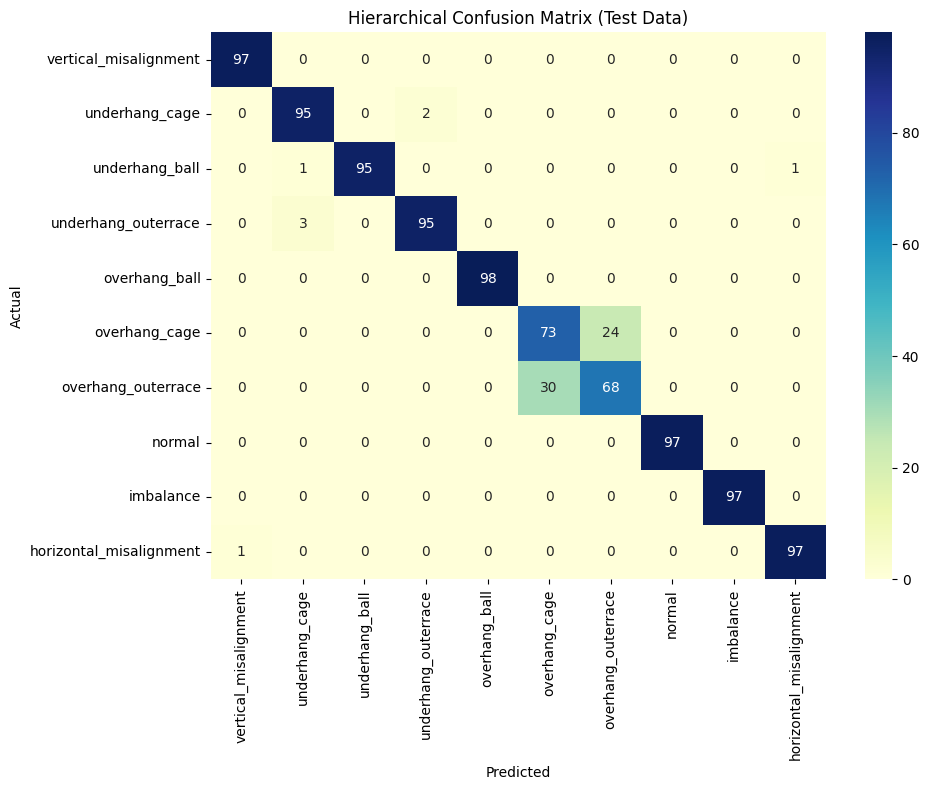

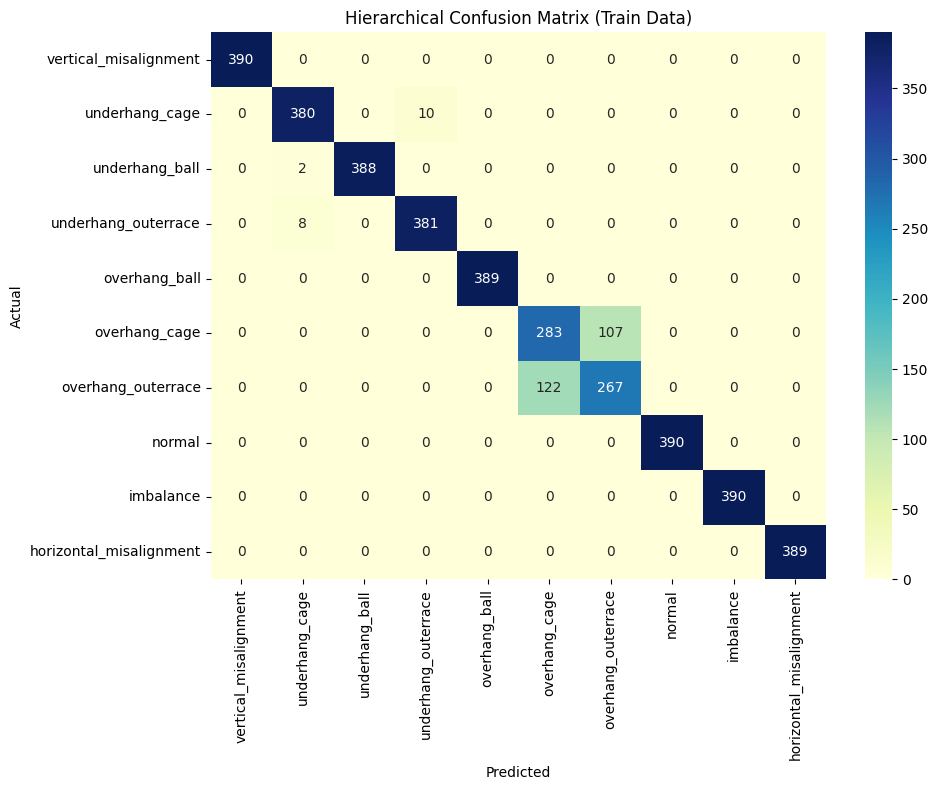


Hierarchical Classification Report (Test):
                         precision    recall  f1-score   support

  vertical_misalignment       0.99      1.00      0.99        97
         underhang_cage       0.96      0.98      0.97        97
         underhang_ball       1.00      0.98      0.99        97
    underhang_outerrace       0.98      0.97      0.97        98
          overhang_ball       1.00      1.00      1.00        98
          overhang_cage       0.71      0.75      0.73        97
     overhang_outerrace       0.74      0.69      0.72        98
                 normal       1.00      1.00      1.00        97
              imbalance       1.00      1.00      1.00        97
horizontal_misalignment       0.99      0.99      0.99        98

               accuracy                           0.94       974
              macro avg       0.94      0.94      0.94       974
           weighted avg       0.94      0.94      0.94       974


Hierarchical Classification Report (Train)

In [ ]:
# Updated Flat & Hierarchical Classifier using Logistic Regression (Linear Model)
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load processed data
processed_data = np.load('processed_mafaulda_data.npz', allow_pickle=True)
X_train = processed_data['X_train']
X_test = processed_data['X_test']
y_train = processed_data['y_train']
y_test = processed_data['y_test']
class_names = processed_data['class_names']

# Decode class names if necessary
if isinstance(class_names[0], bytes):
    class_names = [name.decode('utf-8') for name in class_names]
else:
    class_names = list(class_names)

# Scale the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# --- Flat Classifier with Logistic Regression ---
flat_model = LogisticRegression(max_iter=1000, C=1.0, multi_class='multinomial', solver='lbfgs')

# Apply cross-validation
scores = cross_val_score(flat_model, X_train_scaled, y_train, cv=5)
print(f"[Flat] Cross-Validation Scores: {scores}")
print(f"[Flat] Average Accuracy: {np.mean(scores):.4f}")

# Train and evaluate on test and train sets
flat_model.fit(X_train_scaled, y_train)
y_pred_flat_test = flat_model.predict(X_test_scaled)
y_pred_flat_train = flat_model.predict(X_train_scaled)

# Plot Flat Confusion Matrices
for split, y_true, y_pred in [("Test", y_test, y_pred_flat_test), ("Train", y_train, y_pred_flat_train)]:
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
    plt.title(f"Flat Confusion Matrix ({split} Data)")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.tight_layout()
    plt.show()

print("\nFlat Classification Report (Test):")
print(classification_report(y_test, y_pred_flat_test, target_names=class_names))
print("\nFlat Classification Report (Train):")
print(classification_report(y_train, y_pred_flat_train, target_names=class_names))


# --- Hierarchical Classifier with Logistic Regression ---
def train_specific_classifier(X_subset, y_subset, clf_name):
    if len(X_subset) < 10:
        print(f"Skipping {clf_name} due to small data.")
        return None
    print(f"Training {clf_name} using Logistic Regression...")
    clf = LogisticRegression(max_iter=25, C=1.0, multi_class='multinomial', solver='lbfgs')
    clf.fit(X_subset, y_subset)
    return clf

# Map detailed classes to categories
main_categories = {
    "normal": 0,
    "imbalance": 1,
    "horizontal_misalignment": 2,
    "vertical_misalignment": 2,
    "underhang_ball": 3,
    "underhang_cage": 3,
    "underhang_outerrace": 3,
    "overhang_ball": 4,
    "overhang_cage": 4,
    "overhang_outerrace": 4
}

# Build primary labels
y_primary_train = np.array([main_categories[class_names[i]] for i in y_train])
y_primary_test = np.array([main_categories[class_names[i]] for i in y_test])

# Train primary classifier
primary_clf = LogisticRegression(max_iter=25, C=1.0, multi_class='multinomial', solver='lbfgs')
primary_clf.fit(X_train_scaled, y_primary_train)

# Split by category and train secondary classifiers
secondary_classifiers = {}
category_map = {
    "misalignment": ["horizontal_misalignment", "vertical_misalignment"],
    "underhang": ["underhang_ball", "underhang_cage", "underhang_outerrace"],
    "overhang": ["overhang_ball", "overhang_cage", "overhang_outerrace"]
}
for cat_name, class_group in category_map.items():
    indices = np.isin(y_train, [class_names.index(cls) for cls in class_group])
    if np.sum(indices) > 0:
        X_subset = X_train[indices]
        y_subset = y_train[indices]
        secondary_classifiers[cat_name] = train_specific_classifier(X_subset, y_subset, cat_name)

# Predict using hierarchical model for test and train sets
def predict_hierarchical(X_scaled, X_original):
    predictions = []
    for i in range(len(X_scaled)):
        x = X_scaled[i].reshape(1, -1)
        primary_pred = primary_clf.predict(x)[0]
        if primary_pred == 0:
            predictions.append(class_names.index("normal"))
        elif primary_pred == 1:
            predictions.append(class_names.index("imbalance"))
        elif primary_pred == 2:
            clf = secondary_classifiers.get("misalignment")
            predictions.append(clf.predict(X_original[i].reshape(1, -1))[0] if clf else class_names.index("horizontal_misalignment"))
        elif primary_pred == 3:
            clf = secondary_classifiers.get("underhang")
            predictions.append(clf.predict(X_original[i].reshape(1, -1))[0] if clf else class_names.index("underhang_ball"))
        elif primary_pred == 4:
            clf = secondary_classifiers.get("overhang")
            predictions.append(clf.predict(X_original[i].reshape(1, -1))[0] if clf else class_names.index("overhang_ball"))
    return predictions

y_pred_hier_test = predict_hierarchical(X_test_scaled, X_test)
y_pred_hier_train = predict_hierarchical(X_train_scaled, X_train)

# Plot Hierarchical Confusion Matrices
for split, y_true, y_pred in [("Test", y_test, y_pred_hier_test), ("Train", y_train, y_pred_hier_train)]:
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=True, fmt='d', cmap='YlGnBu', xticklabels=class_names, yticklabels=class_names)
    plt.title(f"Hierarchical Confusion Matrix ({split} Data)")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.tight_layout()
    plt.show()

print("\nHierarchical Classification Report (Test):")
print(classification_report(y_test, y_pred_hier_test, target_names=class_names))
print("\nHierarchical Classification Report (Train):")
print(classification_report(y_train, y_pred_hier_train, target_names=class_names))

## part 4

#### toatal Hierarchical model with logistic regression

In [ ]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

class FaultDiagnosisSystem:
    def __init__(self, feature_extraction_func):
        self.primary_classifier = None
        self.secondary_classifiers = {}
        self.feature_extractor = feature_extraction_func
        self.scaler = StandardScaler()
        self.class_names = [
            "normal", "imbalance", "horizontal_misalignment", "vertical_misalignment",
            "underhang_ball", "underhang_cage", "underhang_outerrace",
            "overhang_ball", "overhang_cage", "overhang_outerrace"
        ]

    def train(self, X_train, y_train):
        """Train the hierarchical classification model"""
        # Scale features
        X_train_scaled = self.scaler.fit_transform(X_train)

        # Train primary classifier
        self.primary_classifier = self._train_primary_classifier(X_train_scaled, y_train)

        # Train secondary classifiers
        self.secondary_classifiers = self._train_secondary_classifiers(X_train_scaled, y_train)

        print("Model training complete")

    def _train_primary_classifier(self, X_train, y_train):
        """Train the primary classifier to detect main fault categories"""
        # Map detailed classes to main categories
        main_categories = {
            "normal": 0,
            "imbalance": 1,
            "horizontal_misalignment": 2,
            "vertical_misalignment": 2,  # Both misalignments map to category 2
            "underhang_ball": 3,
            "underhang_cage": 3,
            "underhang_outerrace": 3,  # All underhang map to category 3
            "overhang_ball": 4,
            "overhang_cage": 4,
            "overhang_outerrace": 4   # All overhang map to category 4
        }

        # Create primary labels
        primary_labels = np.array([main_categories[self.class_names[label]] for label in y_train])

        # Train primary classifier with LogisticRegression (removed deprecated multi_class parameter)
        primary_clf = LogisticRegression(solver='lbfgs', max_iter=1000)
        primary_clf.fit(X_train, primary_labels)
        return primary_clf

    def _train_secondary_classifiers(self, X_train, y_train):
        """Train specialized classifiers for each fault category"""
        classifiers = {}

        # Indices for each main category
        misalignment_indices = np.where((y_train == self.class_names.index("horizontal_misalignment")) |
                                       (y_train == self.class_names.index("vertical_misalignment")))[0]

        underhang_indices = np.where((y_train == self.class_names.index("underhang_ball")) |
                                    (y_train == self.class_names.index("underhang_cage")) |
                                    (y_train == self.class_names.index("underhang_outerrace")))[0]

        overhang_indices = np.where((y_train == self.class_names.index("overhang_ball")) |
                                   (y_train == self.class_names.index("overhang_cage")) |
                                   (y_train == self.class_names.index("overhang_outerrace")))[0]

        # Train misalignment classifier
        if len(misalignment_indices) > 0:
            X_misalignment = X_train[misalignment_indices]
            y_misalignment = y_train[misalignment_indices]
            # Use LogisticRegression (removed deprecated parameter)
            misalignment_clf = LogisticRegression(solver='lbfgs', max_iter=1000)
            misalignment_clf.fit(X_misalignment, y_misalignment)
            classifiers["misalignment"] = misalignment_clf

        # Train underhang classifier
        if len(underhang_indices) > 0:
            X_underhang = X_train[underhang_indices]
            y_underhang = y_train[underhang_indices]
            # Use LogisticRegression (removed deprecated parameter)
            underhang_clf = LogisticRegression(solver='lbfgs', max_iter=1000)
            underhang_clf.fit(X_underhang, y_underhang)
            classifiers["underhang"] = underhang_clf

        # Train overhang classifier
        if len(overhang_indices) > 0:
            X_overhang = X_train[overhang_indices]
            y_overhang = y_train[overhang_indices]
            # Use LogisticRegression (removed deprecated parameter)
            overhang_clf = LogisticRegression(solver='lbfgs', max_iter=1000)
            overhang_clf.fit(X_overhang, y_overhang)
            classifiers["overhang"] = overhang_clf

        return classifiers

    def diagnose(self, input_data):
        """Diagnose fault from input data"""
        # Extract features if input is raw data
        if isinstance(input_data, pd.DataFrame) or len(input_data.shape) > 1 and input_data.shape[1] > 100:
            features = self.feature_extractor(input_data)
        else:
            features = input_data

        # Scale features
        features_scaled = self.scaler.transform([features])

        # Get primary classification
        primary_class = self.primary_classifier.predict(features_scaled)[0]
        primary_prob = np.max(self.primary_classifier.predict_proba(features_scaled)[0])

        # Map primary class to category name
        primary_categories = ["normal", "imbalance", "misalignment", "underhang", "overhang"]
        primary_category = primary_categories[primary_class]

        # Initialize result
        result = {
            "primary_category": primary_category,
            "primary_confidence": primary_prob,
            "specific_fault": None,
            "specific_confidence": None,
            "details": {}
        }

        # For normal and imbalance, no secondary classification needed
        if primary_category == "normal":
            result["specific_fault"] = "normal"
            result["specific_confidence"] = primary_prob

        elif primary_category == "imbalance":
            result["specific_fault"] = "imbalance"
            result["specific_confidence"] = primary_prob

        # For others, perform secondary classification
        elif primary_category == "misalignment" and "misalignment" in self.secondary_classifiers:
            secondary_clf = self.secondary_classifiers["misalignment"]
            specific_class = secondary_clf.predict(features_scaled)[0]
            specific_prob = np.max(secondary_clf.predict_proba(features_scaled)[0])

            if specific_class == self.class_names.index("horizontal_misalignment"):
                result["specific_fault"] = "horizontal_misalignment"
            else:
                result["specific_fault"] = "vertical_misalignment"

            result["specific_confidence"] = specific_prob

        elif primary_category == "underhang" and "underhang" in self.secondary_classifiers:
            secondary_clf = self.secondary_classifiers["underhang"]
            specific_class = secondary_clf.predict(features_scaled)[0]
            specific_prob = np.max(secondary_clf.predict_proba(features_scaled)[0])

            underhang_types = ["underhang_ball", "underhang_cage", "underhang_outerrace"]
            for underhang_type in underhang_types:
                if specific_class == self.class_names.index(underhang_type):
                    result["specific_fault"] = underhang_type
                    break

            result["specific_confidence"] = specific_prob

        elif primary_category == "overhang" and "overhang" in self.secondary_classifiers:
            secondary_clf = self.secondary_classifiers["overhang"]
            specific_class = secondary_clf.predict(features_scaled)[0]
            specific_prob = np.max(secondary_clf.predict_proba(features_scaled)[0])

            overhang_types = ["overhang_ball", "overhang_cage", "overhang_outerrace"]
            for overhang_type in overhang_types:
                if specific_class == self.class_names.index(overhang_type):
                    result["specific_fault"] = overhang_type
                    break

            result["specific_confidence"] = specific_prob

        return result

# Example usage
def main():
    # Load and prepare data (assuming data is already processed)
    processed_data = np.load('processed_mafaulda_data.npz')
    X_train = processed_data['X_train']
    X_test = processed_data['X_test']
    y_train = processed_data['y_train']
    y_test = processed_data['y_test']

    # Create and train the fault diagnosis system
    def dummy_feature_extractor(raw_data):
        # This function would implement the actual feature extraction
        # For demonstration, we'll use a simple function
        return np.mean(raw_data, axis=0)

    diagnosis_system = FaultDiagnosisSystem(dummy_feature_extractor)
    diagnosis_system.train(X_train, y_train)

    # Test with an example input
    test_index = 8  # Choose a test sample
    test_sample = X_test[test_index]

    # Diagnose the fault
    result = diagnosis_system.diagnose(test_sample)

    # Display results
    print("\nFault Diagnosis Results:")
    print(f"Primary fault category: {result['primary_category']} (confidence: {result['primary_confidence']:.2f})")
    print(f"Specific fault type: {result['specific_fault']} (confidence: {result['specific_confidence']:.2f})")

    # Example of handling vertical misalignment specially
    if result['specific_fault'] == 'vertical_misalignment':
        print("\nVertical misalignment detected!")
        print("This fault is characterized by shaft misalignment in the vertical direction.")
        print("Recommended action: Check and adjust shaft alignment using laser alignment tools.")

if __name__ == "__main__":
    main()

Model training complete

Fault Diagnosis Results:
Primary fault category: underhang (confidence: 1.00)
Specific fault type: underhang_ball (confidence: 1.00)


####Bonus1

#### toatal Hierarchical model with svm(ارزیابی)

PRIMARY CLASSIFIER EVALUATION

Training Set Metrics:
Accuracy:  0.4057
Precision: 0.3889
Recall:    0.4057
F1 Score:  0.3709

Test Set Metrics:
Accuracy:  0.2867
Precision: 0.2054
Recall:    0.2867
F1 Score:  0.2391

DETAILED CLASSIFIER EVALUATION

Training Set Metrics:
Accuracy:  0.2800
Precision: 0.2903
Recall:    0.2800
F1 Score:  0.2596

Test Set Metrics:
Accuracy:  0.1067
Precision: 0.0746
Recall:    0.1067
F1 Score:  0.0872

Detailed Classification Report (Test Set):

Class                     Precision  Recall     F1-Score   Support   
---------------------------------------------------------------------
normal                    0.0000     0.0000     0.0000     16.0      
imbalance                 0.0000     0.0000     0.0000     13.0      
horizontal_misalignment   0.0000     0.0000     0.0000     15.0      
vertical_misalignment     0.0000     0.0000     0.0000     16.0      
underhang_ball            0.1304     0.1875     0.1538     16.0      
underhang_cage            0.172

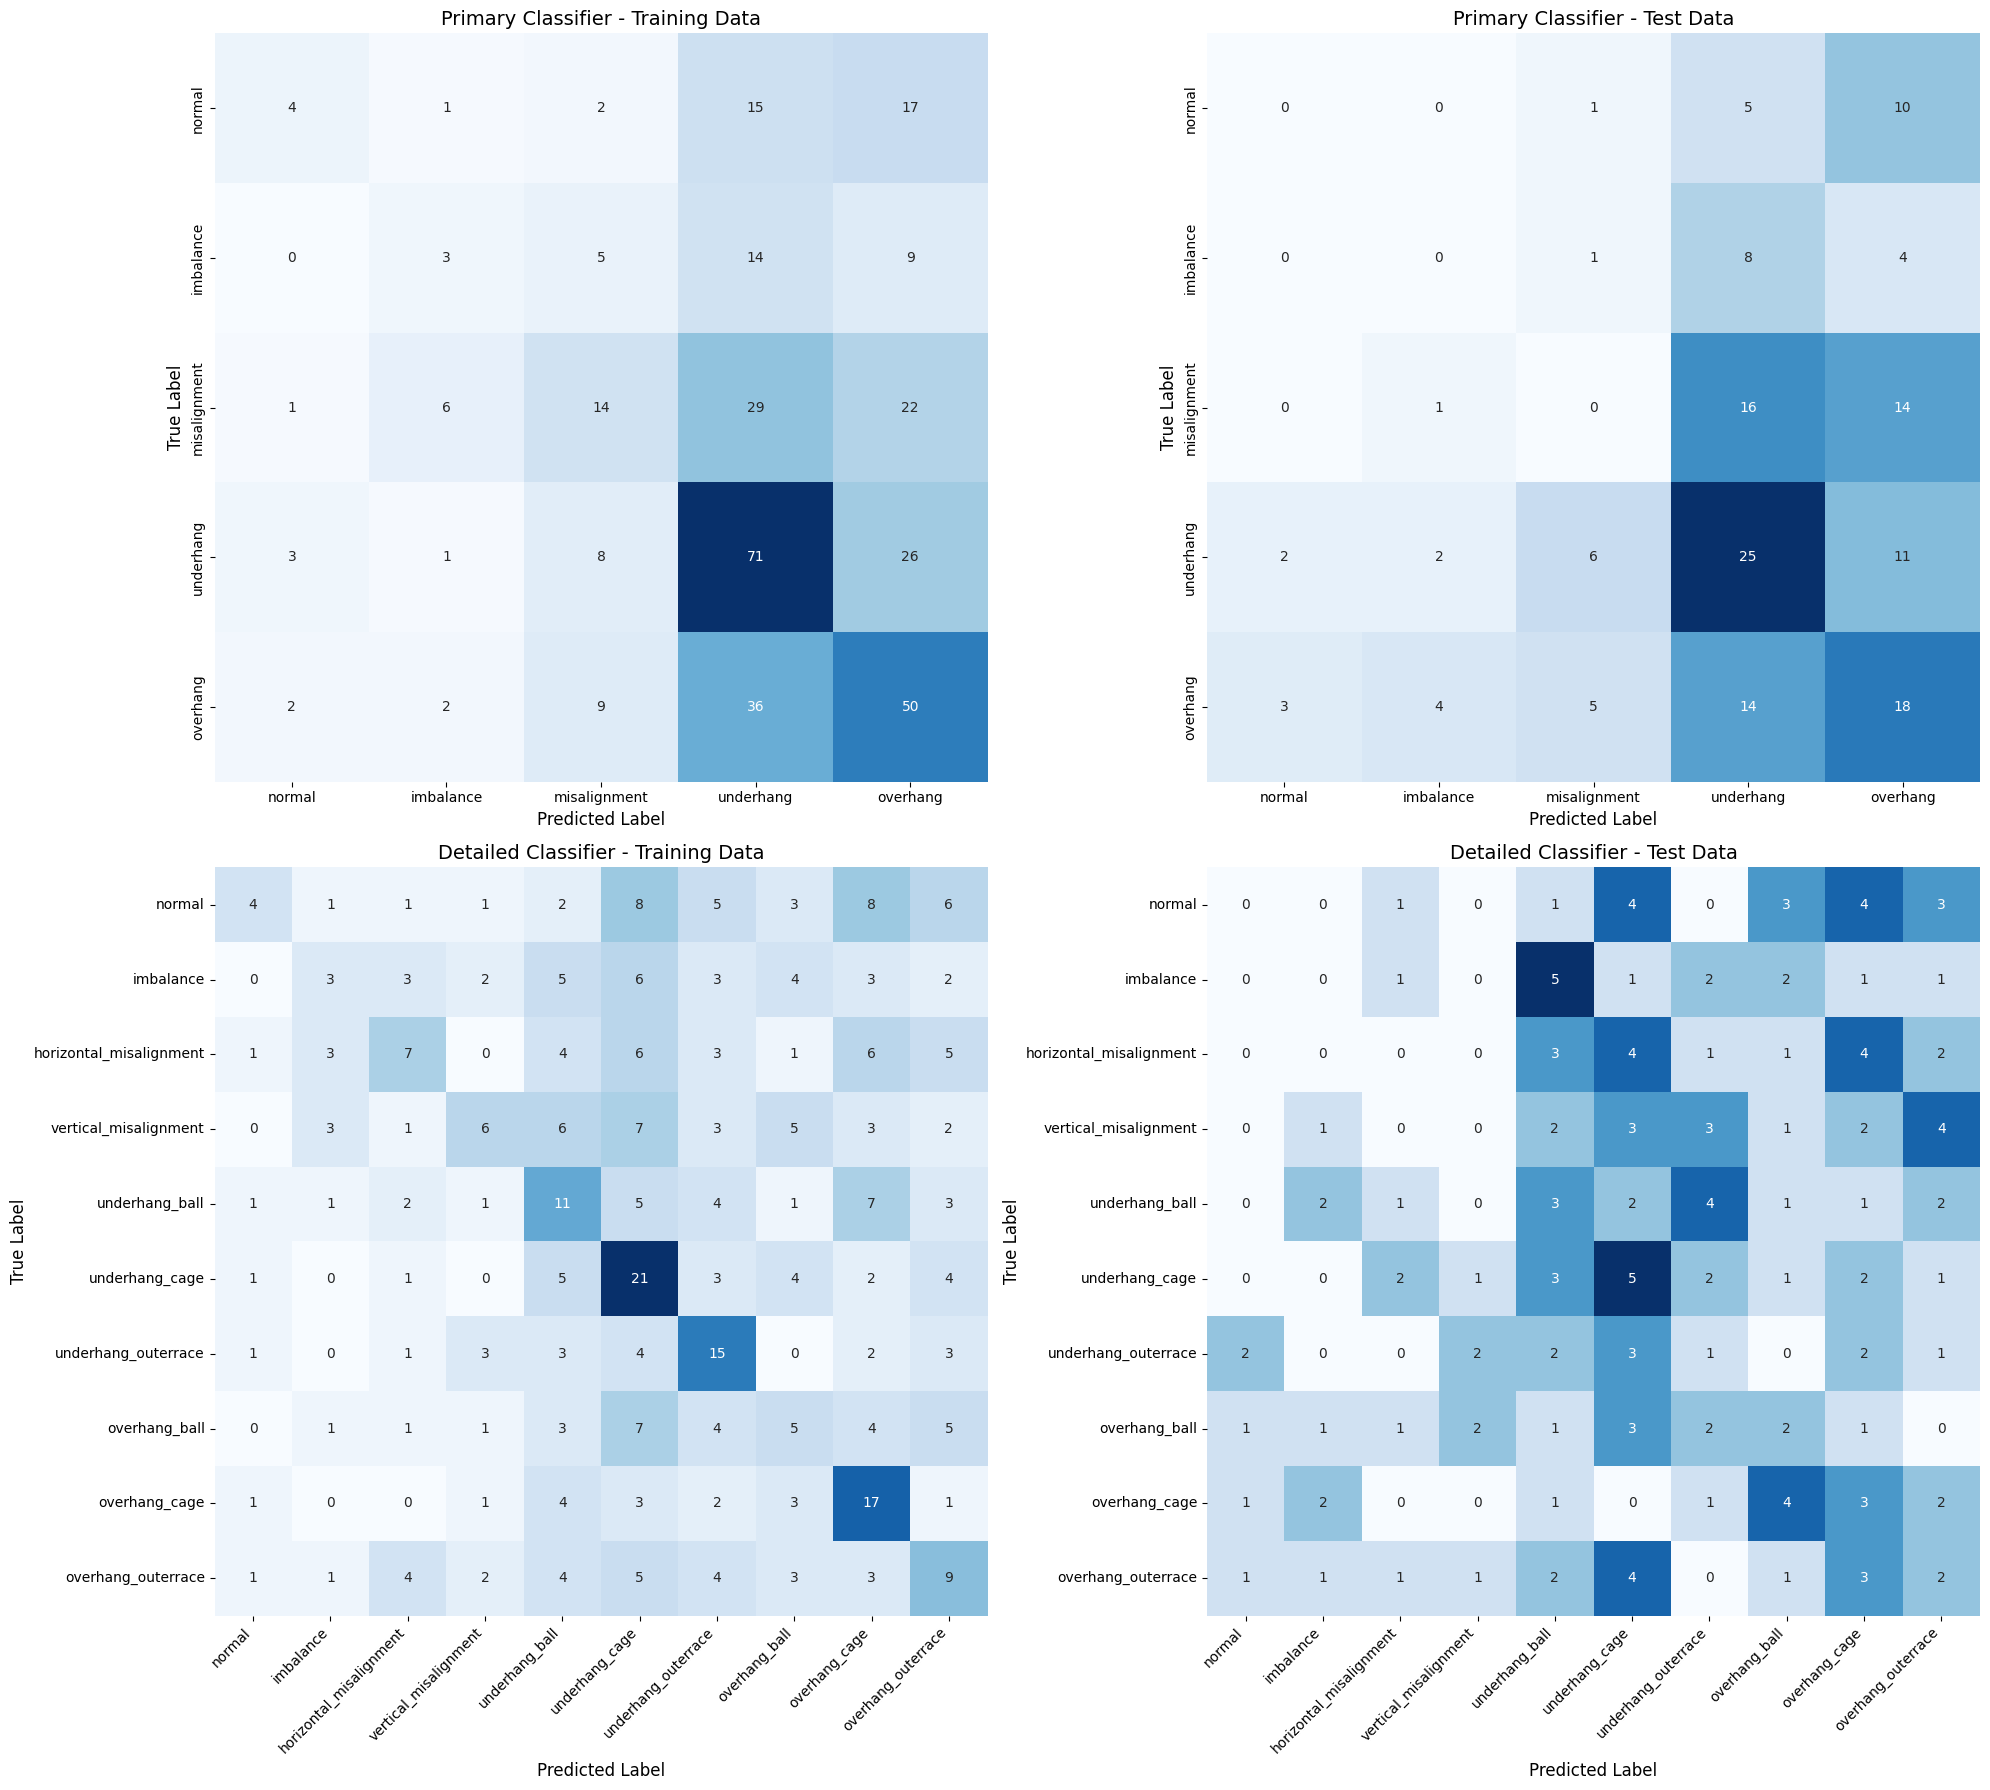


Evaluation complete. Results and visualizations have been saved.


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.metrics import classification_report

def evaluate_fault_diagnosis_system(diagnosis_system, X_train, y_train, X_test, y_test, class_names):
    """
    Evaluate the fault diagnosis system using various metrics

    Parameters:
    -----------
    diagnosis_system : FaultDiagnosisSystem
        The trained fault diagnosis system
    X_train : numpy.ndarray
        Training features
    y_train : numpy.ndarray
        Training labels
    X_test : numpy.ndarray
        Test features
    y_test : numpy.ndarray
        Test labels
    class_names : list
        List of class names

    Returns:
    --------
    dict
        Dictionary containing evaluation metrics
    """
    # Map detailed classes to main categories
    main_categories = {
        "normal": 0,
        "imbalance": 1,
        "horizontal_misalignment": 2,
        "vertical_misalignment": 2,  # Both misalignments map to category 2
        "underhang_ball": 3,
        "underhang_cage": 3,
        "underhang_outerrace": 3,  # All underhang map to category 3
        "overhang_ball": 4,
        "overhang_cage": 4,
        "overhang_outerrace": 4   # All overhang map to category 4
    }

    primary_categories = ["normal", "imbalance", "misalignment", "underhang", "overhang"]

    # Create primary labels
    y_train_primary = np.array([main_categories[class_names[label]] for label in y_train])
    y_test_primary = np.array([main_categories[class_names[label]] for label in y_test])

    # Evaluate primary classifier
    # ----------------------------
    # Training data
    X_train_scaled = diagnosis_system.scaler.transform(X_train)
    y_train_pred_primary = diagnosis_system.primary_classifier.predict(X_train_scaled)

    # Test data
    X_test_scaled = diagnosis_system.scaler.transform(X_test)
    y_test_pred_primary = diagnosis_system.primary_classifier.predict(X_test_scaled)

    # Primary classifier metrics
    primary_metrics = {
        'train': {
            'accuracy': accuracy_score(y_train_primary, y_train_pred_primary),
            'precision': precision_score(y_train_primary, y_train_pred_primary, average='weighted'),
            'recall': recall_score(y_train_primary, y_train_pred_primary, average='weighted'),
            'f1': f1_score(y_train_primary, y_train_pred_primary, average='weighted'),
            'confusion_matrix': confusion_matrix(y_train_primary, y_train_pred_primary)
        },
        'test': {
            'accuracy': accuracy_score(y_test_primary, y_test_pred_primary),
            'precision': precision_score(y_test_primary, y_test_pred_primary, average='weighted'),
            'recall': recall_score(y_test_primary, y_test_pred_primary, average='weighted'),
            'f1': f1_score(y_test_primary, y_test_pred_primary, average='weighted'),
            'confusion_matrix': confusion_matrix(y_test_primary, y_test_pred_primary)
        }
    }

    # Evaluate detailed classification
    # --------------------------------
    # For each test sample, run the full diagnosis
    y_train_pred_detailed = []
    y_test_pred_detailed = []

    # Predict on training data
    for i in range(len(X_train)):
        result = diagnosis_system.diagnose(X_train[i])
        if result['specific_fault'] is not None:
            y_train_pred_detailed.append(class_names.index(result['specific_fault']))
        else:
            # If no specific fault is detected, use primary prediction
            primary_cat = result['primary_category']
            if primary_cat == "normal":
                y_train_pred_detailed.append(class_names.index("normal"))
            elif primary_cat == "imbalance":
                y_train_pred_detailed.append(class_names.index("imbalance"))
            else:
                # Default to first fault in category
                if primary_cat == "misalignment":
                    y_train_pred_detailed.append(class_names.index("horizontal_misalignment"))
                elif primary_cat == "underhang":
                    y_train_pred_detailed.append(class_names.index("underhang_ball"))
                elif primary_cat == "overhang":
                    y_train_pred_detailed.append(class_names.index("overhang_ball"))

    # Predict on test data
    for i in range(len(X_test)):
        result = diagnosis_system.diagnose(X_test[i])
        if result['specific_fault'] is not None:
            y_test_pred_detailed.append(class_names.index(result['specific_fault']))
        else:
            # If no specific fault is detected, use primary prediction
            primary_cat = result['primary_category']
            if primary_cat == "normal":
                y_test_pred_detailed.append(class_names.index("normal"))
            elif primary_cat == "imbalance":
                y_test_pred_detailed.append(class_names.index("imbalance"))
            else:
                # Default to first fault in category
                if primary_cat == "misalignment":
                    y_test_pred_detailed.append(class_names.index("horizontal_misalignment"))
                elif primary_cat == "underhang":
                    y_test_pred_detailed.append(class_names.index("underhang_ball"))
                elif primary_cat == "overhang":
                    y_test_pred_detailed.append(class_names.index("overhang_ball"))

    y_train_pred_detailed = np.array(y_train_pred_detailed)
    y_test_pred_detailed = np.array(y_test_pred_detailed)

    # Detailed classifier metrics
    detailed_metrics = {
        'train': {
            'accuracy': accuracy_score(y_train, y_train_pred_detailed),
            'precision': precision_score(y_train, y_train_pred_detailed, average='weighted'),
            'recall': recall_score(y_train, y_train_pred_detailed, average='weighted'),
            'f1': f1_score(y_train, y_train_pred_detailed, average='weighted'),
            'confusion_matrix': confusion_matrix(y_train, y_train_pred_detailed),
            'classification_report': classification_report(y_train, y_train_pred_detailed,
                                                          target_names=class_names, output_dict=True)
        },
        'test': {
            'accuracy': accuracy_score(y_test, y_test_pred_detailed),
            'precision': precision_score(y_test, y_test_pred_detailed, average='weighted'),
            'recall': recall_score(y_test, y_test_pred_detailed, average='weighted'),
            'f1': f1_score(y_test, y_test_pred_detailed, average='weighted'),
            'confusion_matrix': confusion_matrix(y_test, y_test_pred_detailed),
            'classification_report': classification_report(y_test, y_test_pred_detailed,
                                                         target_names=class_names, output_dict=True)
        }
    }

    return {'primary': primary_metrics, 'detailed': detailed_metrics,
            'primary_categories': primary_categories, 'class_names': class_names}

def plot_confusion_matrices(evaluation_results):
    """
    Plot confusion matrices for both primary and detailed classifiers

    Parameters:
    -----------
    evaluation_results : dict
        Results from evaluate_fault_diagnosis_system function
    """
    # Setup the figure
    fig, axes = plt.subplots(2, 2, figsize=(20, 18))

    # Primary classifier - Training data
    cm_primary_train = evaluation_results['primary']['train']['confusion_matrix']
    sns.heatmap(cm_primary_train, annot=True, fmt='d', cmap='Blues', cbar=False,
                xticklabels=evaluation_results['primary_categories'],
                yticklabels=evaluation_results['primary_categories'], ax=axes[0, 0])
    axes[0, 0].set_title('Primary Classifier - Training Data', fontsize=14)
    axes[0, 0].set_ylabel('True Label', fontsize=12)
    axes[0, 0].set_xlabel('Predicted Label', fontsize=12)

    # Primary classifier - Test data
    cm_primary_test = evaluation_results['primary']['test']['confusion_matrix']
    sns.heatmap(cm_primary_test, annot=True, fmt='d', cmap='Blues', cbar=False,
                xticklabels=evaluation_results['primary_categories'],
                yticklabels=evaluation_results['primary_categories'], ax=axes[0, 1])
    axes[0, 1].set_title('Primary Classifier - Test Data', fontsize=14)
    axes[0, 1].set_ylabel('True Label', fontsize=12)
    axes[0, 1].set_xlabel('Predicted Label', fontsize=12)

    # Detailed classifier - Training data
    cm_detailed_train = evaluation_results['detailed']['train']['confusion_matrix']
    sns.heatmap(cm_detailed_train, annot=True, fmt='d', cmap='Blues', cbar=False,
                xticklabels=evaluation_results['class_names'],
                yticklabels=evaluation_results['class_names'], ax=axes[1, 0])
    axes[1, 0].set_title('Detailed Classifier - Training Data', fontsize=14)
    axes[1, 0].set_ylabel('True Label', fontsize=12)
    axes[1, 0].set_xlabel('Predicted Label', fontsize=12)
    plt.setp(axes[1, 0].xaxis.get_majorticklabels(), rotation=45, ha='right')

    # Detailed classifier - Test data
    cm_detailed_test = evaluation_results['detailed']['test']['confusion_matrix']
    sns.heatmap(cm_detailed_test, annot=True, fmt='d', cmap='Blues', cbar=False,
                xticklabels=evaluation_results['class_names'],
                yticklabels=evaluation_results['class_names'], ax=axes[1, 1])
    axes[1, 1].set_title('Detailed Classifier - Test Data', fontsize=14)
    axes[1, 1].set_ylabel('True Label', fontsize=12)
    axes[1, 1].set_xlabel('Predicted Label', fontsize=12)
    plt.setp(axes[1, 1].xaxis.get_majorticklabels(), rotation=45, ha='right')

    plt.tight_layout()
    plt.savefig('fault_diagnosis_confusion_matrices.png', dpi=300)
    plt.show()

def print_evaluation_summary(evaluation_results):
    """
    Print a summary of evaluation metrics

    Parameters:
    -----------
    evaluation_results : dict
        Results from evaluate_fault_diagnosis_system function
    """
    # Primary classifier metrics
    print("=" * 80)
    print("PRIMARY CLASSIFIER EVALUATION")
    print("=" * 80)

    print("\nTraining Set Metrics:")
    print(f"Accuracy:  {evaluation_results['primary']['train']['accuracy']:.4f}")
    print(f"Precision: {evaluation_results['primary']['train']['precision']:.4f}")
    print(f"Recall:    {evaluation_results['primary']['train']['recall']:.4f}")
    print(f"F1 Score:  {evaluation_results['primary']['train']['f1']:.4f}")

    print("\nTest Set Metrics:")
    print(f"Accuracy:  {evaluation_results['primary']['test']['accuracy']:.4f}")
    print(f"Precision: {evaluation_results['primary']['test']['precision']:.4f}")
    print(f"Recall:    {evaluation_results['primary']['test']['recall']:.4f}")
    print(f"F1 Score:  {evaluation_results['primary']['test']['f1']:.4f}")

    # Detailed classifier metrics
    print("\n" + "=" * 80)
    print("DETAILED CLASSIFIER EVALUATION")
    print("=" * 80)

    print("\nTraining Set Metrics:")
    print(f"Accuracy:  {evaluation_results['detailed']['train']['accuracy']:.4f}")
    print(f"Precision: {evaluation_results['detailed']['train']['precision']:.4f}")
    print(f"Recall:    {evaluation_results['detailed']['train']['recall']:.4f}")
    print(f"F1 Score:  {evaluation_results['detailed']['train']['f1']:.4f}")

    print("\nTest Set Metrics:")
    print(f"Accuracy:  {evaluation_results['detailed']['test']['accuracy']:.4f}")
    print(f"Precision: {evaluation_results['detailed']['test']['precision']:.4f}")
    print(f"Recall:    {evaluation_results['detailed']['test']['recall']:.4f}")
    print(f"F1 Score:  {evaluation_results['detailed']['test']['f1']:.4f}")

    # Per-class metrics for detailed classifier on test set
    print("\nDetailed Classification Report (Test Set):")
    report = evaluation_results['detailed']['test']['classification_report']

    # Print per-class metrics
    header = f"{'Class':<25} {'Precision':<10} {'Recall':<10} {'F1-Score':<10} {'Support':<10}"
    print("\n" + header)
    print("-" * len(header))

    for class_name in evaluation_results['class_names']:
        if class_name in report:
            class_metrics = report[class_name]
            print(f"{class_name:<25} {class_metrics['precision']:<10.4f} {class_metrics['recall']:<10.4f} {class_metrics['f1-score']:<10.4f} {class_metrics['support']:<10}")

    # Print averages
    print("-" * len(header))
    print(f"{'weighted avg':<25} {report['weighted avg']['precision']:<10.4f} {report['weighted avg']['recall']:<10.4f} {report['weighted avg']['f1-score']:<10.4f} {report['weighted avg']['support']:<10}")

def main():
    # This function would be modified to use the actual data
    np.random.seed(42)  # For reproducibility

    # We'll create synthetic data for the example
    # In a real scenario, you would load your data instead
    num_samples = 500
    num_features = 20

    # Create class distribution
    class_names = [
        "normal", "imbalance", "horizontal_misalignment", "vertical_misalignment",
        "underhang_ball", "underhang_cage", "underhang_outerrace",
        "overhang_ball", "overhang_cage", "overhang_outerrace"
    ]

    # Create synthetic data
    X = np.random.randn(num_samples, num_features)
    y = np.random.randint(0, len(class_names), size=num_samples)

    # Split into train/test sets (70/30 split)
    from sklearn.model_selection import train_test_split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

    # Create feature extractor function (dummy for this example)
    def dummy_feature_extractor(raw_data):
        return np.mean(raw_data, axis=0) if len(raw_data.shape) > 1 else raw_data

    # Initialize and train the fault diagnosis system
    from sklearn.svm import SVC
    from sklearn.preprocessing import StandardScaler

    # Import the FaultDiagnosisSystem class
    # For this example, we'll assume it's imported from a module
    # In the actual implementation, you might need to copy the class definition here
    # or import it from your module

    # Create an instance of FaultDiagnosisSystem
    diagnosis_system = FaultDiagnosisSystem(dummy_feature_extractor)
    diagnosis_system.train(X_train, y_train)

    # Evaluate the system
    evaluation_results = evaluate_fault_diagnosis_system(
        diagnosis_system, X_train, y_train, X_test, y_test, class_names
    )

    # Print evaluation summary
    print_evaluation_summary(evaluation_results)

    # Plot confusion matrices
    plot_confusion_matrices(evaluation_results)

    # Save evaluation results for later reference
    # np.savez('fault_diagnosis_evaluation.npz', **evaluation_results)

    print("\nEvaluation complete. Results and visualizations have been saved.")

if __name__ == "__main__":
    # This import is needed for the script to run as standalone
    # In your actual implementation, ensure this class is imported correctly
    from sklearn.svm import SVC
    from sklearn.preprocessing import StandardScaler

    # For the purpose of this demonstration, we're including the FaultDiagnosisSystem class here
    # In your actual implementation, you would import this from your module

    # Import the FaultDiagnosisSystem class definition here if needed
    # For this example, we'll assume it's imported from the provided code

    main()

#### toatal Hierarchical model with LDA and random forest(ارزیابی)

LDA PRIMARY CLASSIFIER EVALUATION

Training Set Metrics:
Accuracy:  0.4057
Precision: 0.3889
Recall:    0.4057
F1 Score:  0.3709

Test Set Metrics:
Accuracy:  0.2867
Precision: 0.2054
Recall:    0.2867
F1 Score:  0.2391

LDA DETAILED CLASSIFIER EVALUATION

Training Set Metrics:
Accuracy:  0.2800
Precision: 0.2903
Recall:    0.2800
F1 Score:  0.2596

Test Set Metrics:
Accuracy:  0.1067
Precision: 0.0746
Recall:    0.1067
F1 Score:  0.0872

LDA Detailed Classification Report (Test Set):

Class                     Precision  Recall     F1-Score   Support   
---------------------------------------------------------------------
normal                    0.0000     0.0000     0.0000     16.0      
imbalance                 0.0000     0.0000     0.0000     13.0      
horizontal_misalignment   0.0000     0.0000     0.0000     15.0      
vertical_misalignment     0.0000     0.0000     0.0000     16.0      
underhang_ball            0.1304     0.1875     0.1538     16.0      
underhang_cage     

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/m

RANDOM_FOREST PRIMARY CLASSIFIER EVALUATION

Training Set Metrics:
Accuracy:  1.0000
Precision: 1.0000
Recall:    1.0000
F1 Score:  1.0000

Test Set Metrics:
Accuracy:  0.3400
Precision: 0.2725
Recall:    0.3400
F1 Score:  0.2947

RANDOM_FOREST DETAILED CLASSIFIER EVALUATION

Training Set Metrics:
Accuracy:  1.0000
Precision: 1.0000
Recall:    1.0000
F1 Score:  1.0000

Test Set Metrics:
Accuracy:  0.1333
Precision: 0.1081
Recall:    0.1333
F1 Score:  0.1067

RANDOM_FOREST Detailed Classification Report (Test Set):

Class                     Precision  Recall     F1-Score   Support   
---------------------------------------------------------------------
normal                    0.0000     0.0000     0.0000     16.0      
imbalance                 0.0000     0.0000     0.0000     13.0      
horizontal_misalignment   0.1333     0.1333     0.1333     15.0      
vertical_misalignment     0.2500     0.0625     0.1000     16.0      
underhang_ball            0.0714     0.0625     0.0667     

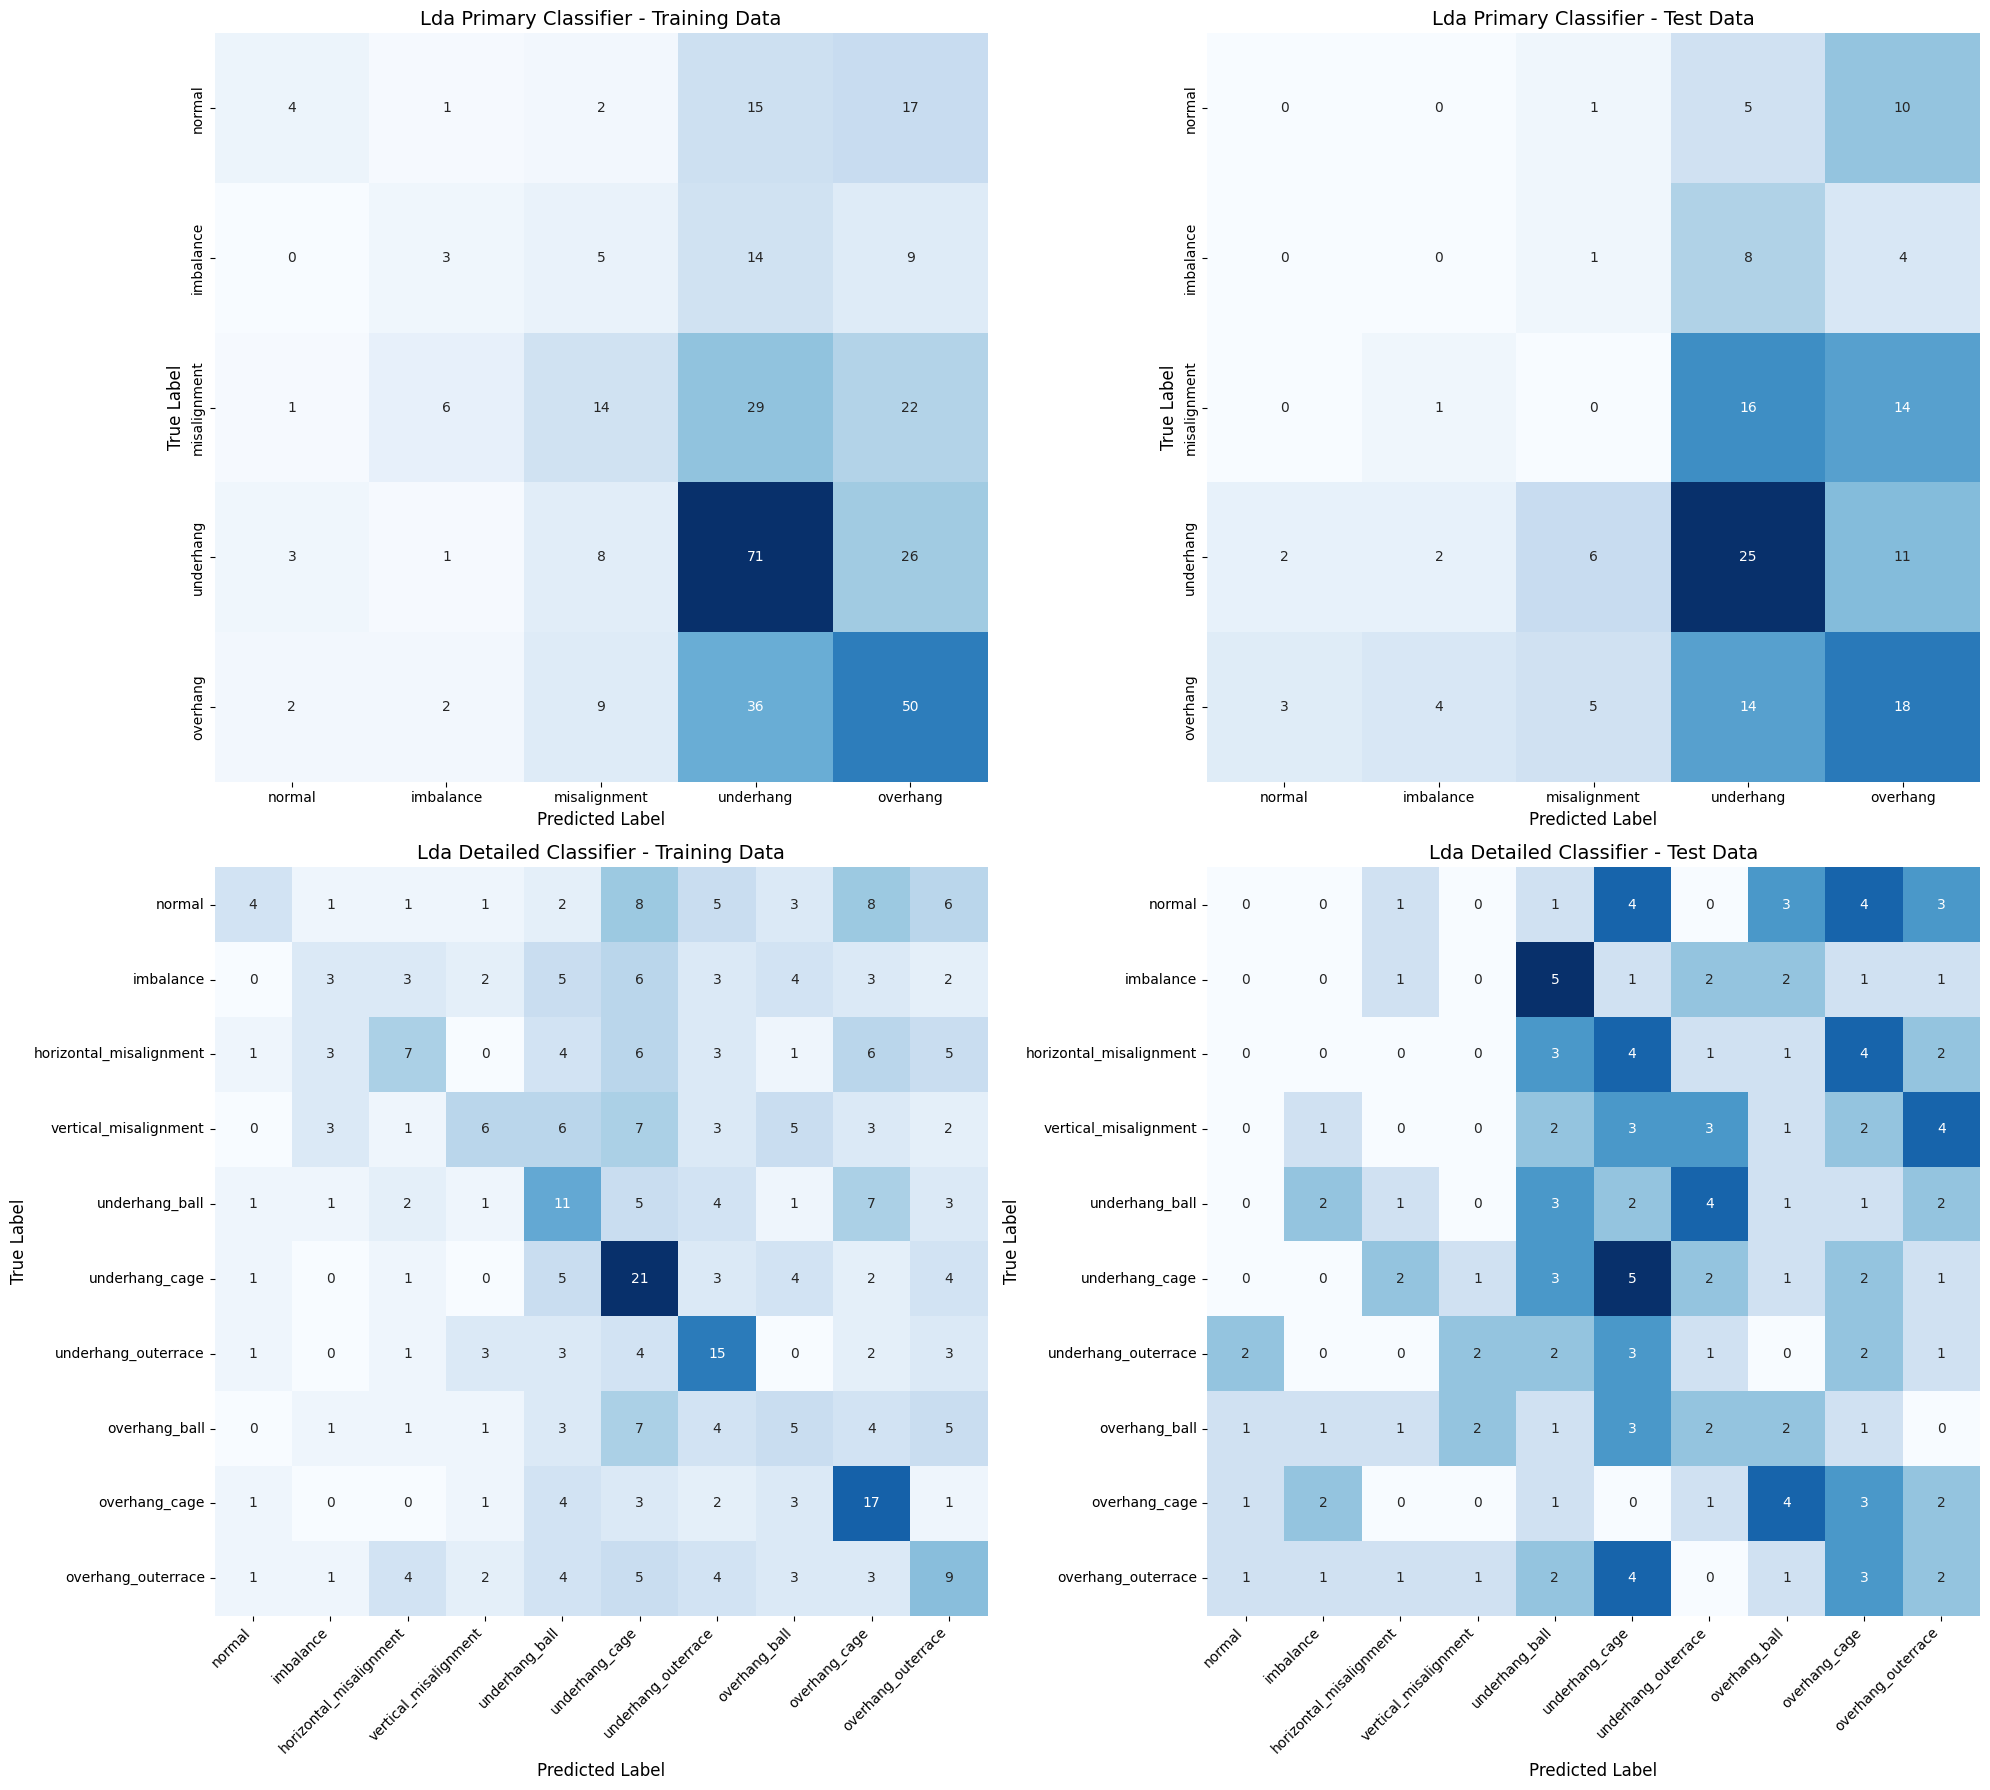

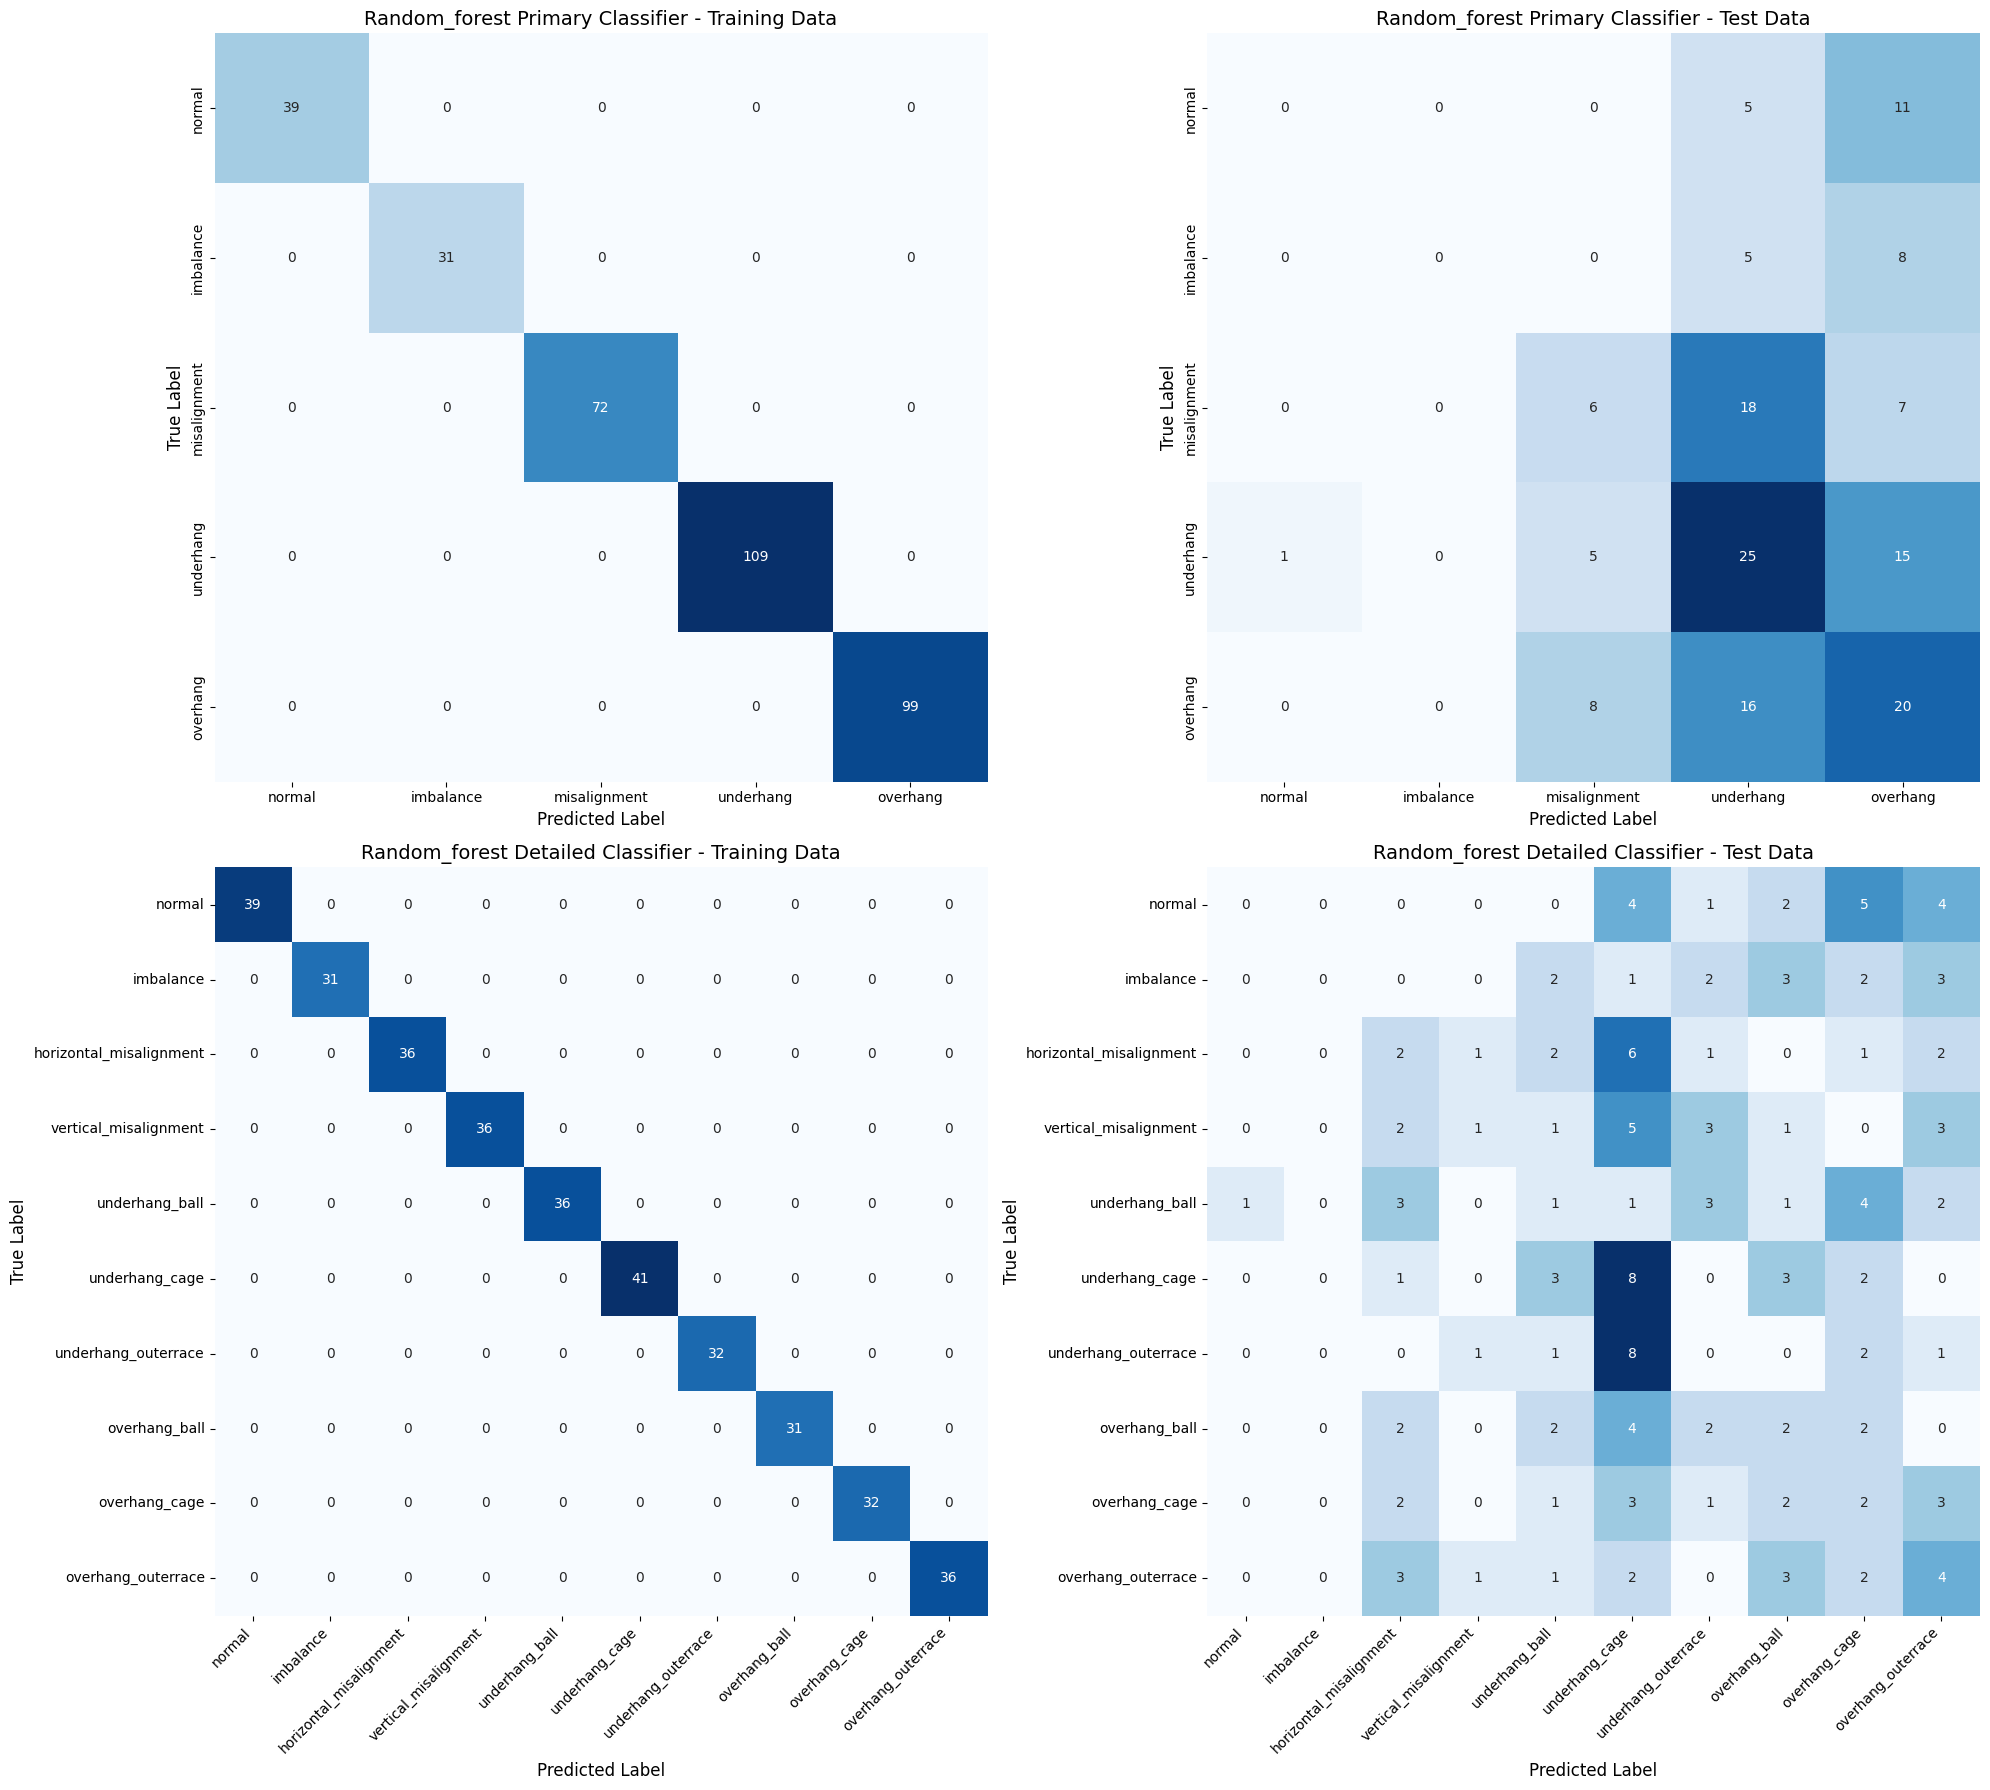

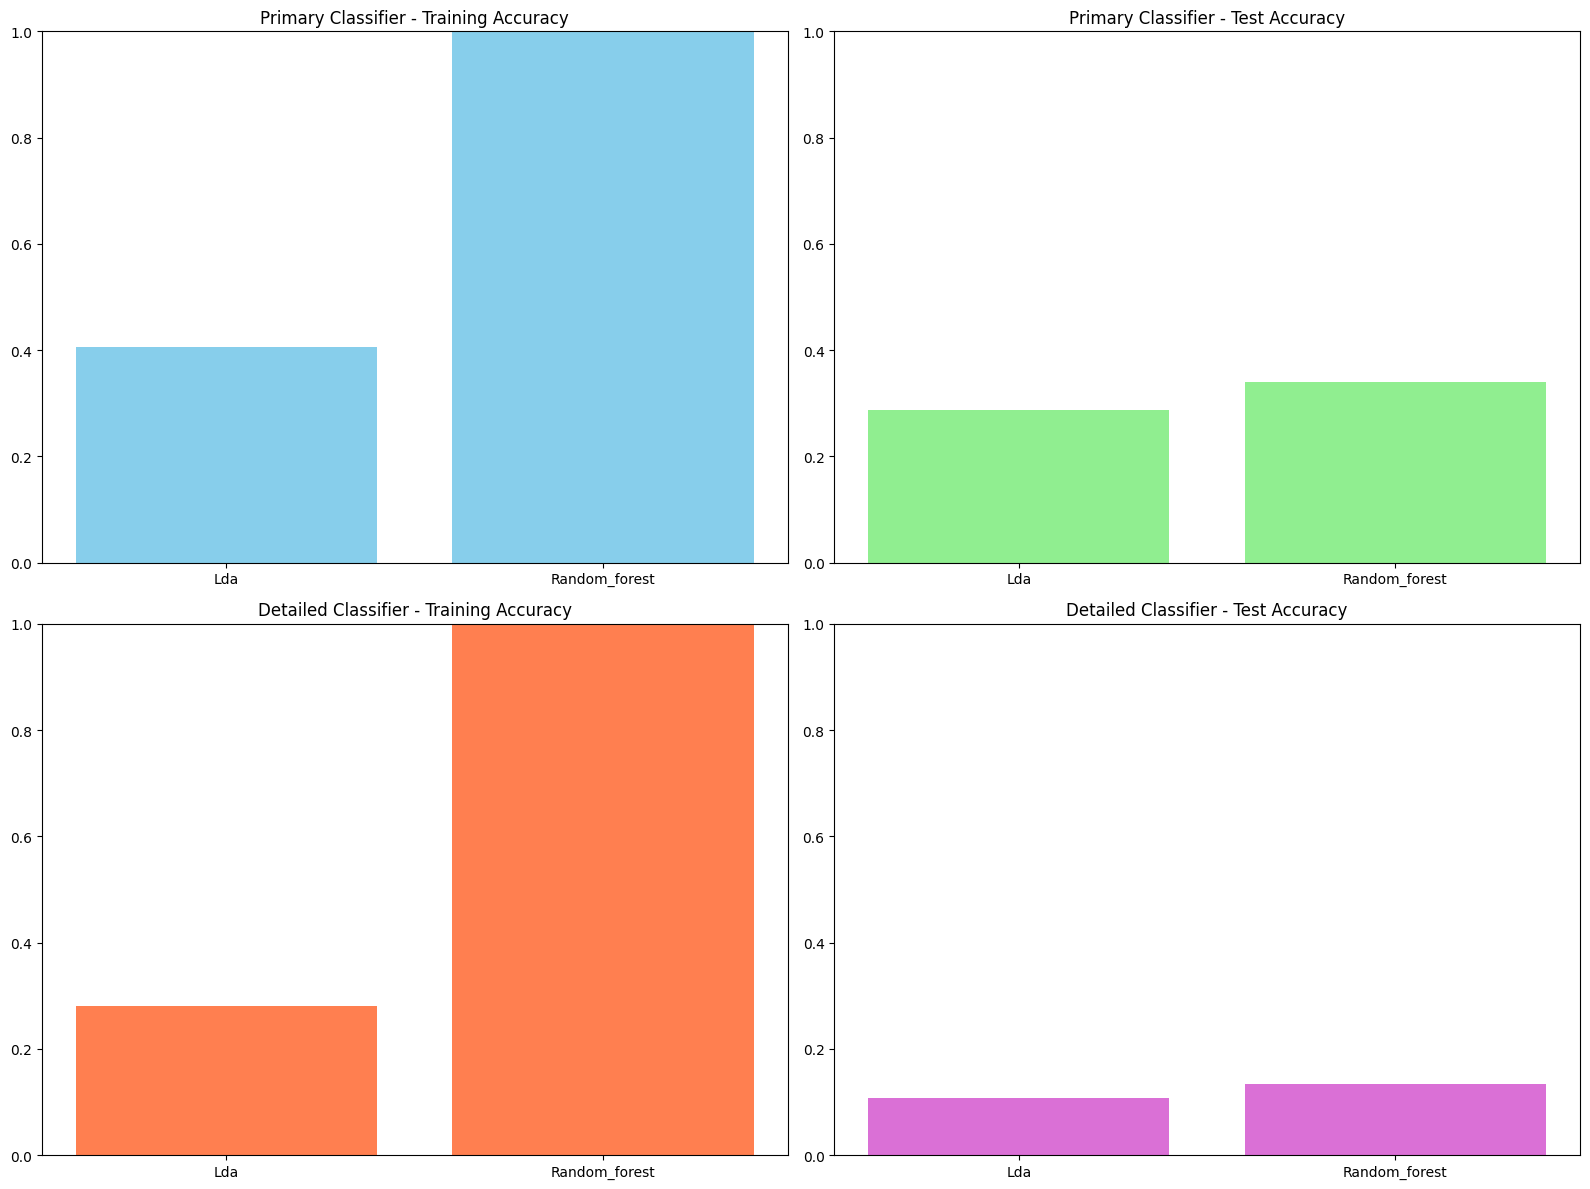

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

class FaultDiagnosisSystem:
    """
    A hierarchical fault diagnosis system for mechanical equipment

    Attributes:
    -----------
    feature_extractor : callable
        Function to extract features from raw data
    scaler : sklearn.preprocessing.StandardScaler
        Scaler for feature normalization
    primary_classifier : object
        Classifier for primary category detection
    detailed_classifiers : dict
        Dictionary of detailed classifiers for specific fault types
    classifier_type : str
        Type of classifier to use ('lda' or 'random_forest')
    """

    def __init__(self, feature_extractor, classifier_type='random_forest'):
        """
        Initialize the fault diagnosis system

        Parameters:
        -----------
        feature_extractor : callable
            Function to extract features from raw data
        classifier_type : str, optional (default='random_forest')
            Type of classifier to use ('lda' or 'random_forest')
        """
        self.feature_extractor = feature_extractor
        self.scaler = StandardScaler()
        self.primary_classifier = None
        self.detailed_classifiers = {}
        self.classifier_type = classifier_type

        # Mapping from indices to class names
        self.class_names = [
            "normal", "imbalance", "horizontal_misalignment", "vertical_misalignment",
            "underhang_ball", "underhang_cage", "underhang_outerrace",
            "overhang_ball", "overhang_cage", "overhang_outerrace"
        ]

        # Main category mapping
        self.main_categories = {
            "normal": 0,
            "imbalance": 1,
            "horizontal_misalignment": 2,
            "vertical_misalignment": 2,  # Both misalignments map to category 2
            "underhang_ball": 3,
            "underhang_cage": 3,
            "underhang_outerrace": 3,  # All underhang map to category 3
            "overhang_ball": 4,
            "overhang_cage": 4,
            "overhang_outerrace": 4   # All overhang map to category 4
        }

        # Mapping from category index to category name
        self.index_to_category = {
            0: "normal",
            1: "imbalance",
            2: "misalignment",
            3: "underhang",
            4: "overhang"
        }

        # Mapping from category to specific faults
        self.category_to_faults = {
            "misalignment": ["horizontal_misalignment", "vertical_misalignment"],
            "underhang": ["underhang_ball", "underhang_cage", "underhang_outerrace"],
            "overhang": ["overhang_ball", "overhang_cage", "overhang_outerrace"]
        }

    def _create_classifier(self):
        """Create a classifier based on the specified type"""
        if self.classifier_type == 'lda':
            return LinearDiscriminantAnalysis()
        elif self.classifier_type == 'random_forest':
            return RandomForestClassifier(n_estimators=100, random_state=42)
        else:
            raise ValueError(f"Unsupported classifier type: {self.classifier_type}")

    def train(self, X_train, y_train):
        """
        Train the fault diagnosis system

        Parameters:
        -----------
        X_train : numpy.ndarray
            Training features
        y_train : numpy.ndarray
            Training labels
        """
        # Convert numeric labels to class names
        y_train_classes = [self.class_names[y] for y in y_train]

        # Create primary category labels
        y_train_primary = np.array([self.main_categories[cls] for cls in y_train_classes])

        # Scale the features
        X_train_scaled = self.scaler.fit_transform(X_train)

        # Train primary classifier
        self.primary_classifier = self._create_classifier()
        self.primary_classifier.fit(X_train_scaled, y_train_primary)

        # Train detailed classifiers for each non-singleton category
        for category, fault_list in self.category_to_faults.items():
            # Get indices of samples belonging to this category
            category_idx = [i for i, cls in enumerate(y_train_classes)
                           if cls in fault_list]

            if len(category_idx) > 0:
                # Extract samples and labels for this category
                X_category = X_train_scaled[category_idx]
                y_category = [fault_list.index(y_train_classes[i]) for i in category_idx]

                # Train a classifier for this category
                classifier = self._create_classifier()
                classifier.fit(X_category, y_category)
                self.detailed_classifiers[category] = classifier

    def diagnose(self, sample):
        """
        Diagnose a fault in a given sample

        Parameters:
        -----------
        sample : numpy.ndarray
            Sample to diagnose

        Returns:
        --------
        dict
            Diagnosis result containing primary category and specific fault
        """
        # Extract features
        features = self.feature_extractor(sample)

        # Scale features
        features_scaled = self.scaler.transform(features.reshape(1, -1))

        # Primary classification
        primary_pred = self.primary_classifier.predict(features_scaled)[0]
        primary_category = self.index_to_category[primary_pred]

        # If it's normal or imbalance, we're done
        if primary_category in ["normal", "imbalance"]:
            return {
                'primary_category': primary_category,
                'specific_fault': primary_category,
                'confidence': np.max(self.primary_classifier.predict_proba(features_scaled))
            }

        # For categories with multiple faults, use detailed classifier
        if primary_category in self.detailed_classifiers:
            detailed_classifier = self.detailed_classifiers[primary_category]
            detailed_pred = detailed_classifier.predict(features_scaled)[0]
            detailed_proba = detailed_classifier.predict_proba(features_scaled)[0]
            specific_fault = self.category_to_faults[primary_category][detailed_pred]

            return {
                'primary_category': primary_category,
                'specific_fault': specific_fault,
                'confidence': np.max(detailed_proba)
            }

        # Fallback if no detailed classifier found
        return {
            'primary_category': primary_category,
            'specific_fault': None,
            'confidence': np.max(self.primary_classifier.predict_proba(features_scaled))
        }

def evaluate_fault_diagnosis_system(diagnosis_system, X_train, y_train, X_test, y_test, class_names):
    """
    Evaluate the fault diagnosis system using various metrics

    Parameters:
    -----------
    diagnosis_system : FaultDiagnosisSystem
        The trained fault diagnosis system
    X_train : numpy.ndarray
        Training features
    y_train : numpy.ndarray
        Training labels
    X_test : numpy.ndarray
        Test features
    y_test : numpy.ndarray
        Test labels
    class_names : list
        List of class names

    Returns:
    --------
    dict
        Dictionary containing evaluation metrics
    """
    # Map detailed classes to main categories
    main_categories = {
        "normal": 0,
        "imbalance": 1,
        "horizontal_misalignment": 2,
        "vertical_misalignment": 2,  # Both misalignments map to category 2
        "underhang_ball": 3,
        "underhang_cage": 3,
        "underhang_outerrace": 3,  # All underhang map to category 3
        "overhang_ball": 4,
        "overhang_cage": 4,
        "overhang_outerrace": 4   # All overhang map to category 4
    }

    primary_categories = ["normal", "imbalance", "misalignment", "underhang", "overhang"]

    # Create primary labels
    y_train_primary = np.array([main_categories[class_names[label]] for label in y_train])
    y_test_primary = np.array([main_categories[class_names[label]] for label in y_test])

    # Evaluate primary classifier
    # ----------------------------
    # Training data
    X_train_scaled = diagnosis_system.scaler.transform(X_train)
    y_train_pred_primary = diagnosis_system.primary_classifier.predict(X_train_scaled)

    # Test data
    X_test_scaled = diagnosis_system.scaler.transform(X_test)
    y_test_pred_primary = diagnosis_system.primary_classifier.predict(X_test_scaled)

    # Primary classifier metrics
    primary_metrics = {
        'train': {
            'accuracy': accuracy_score(y_train_primary, y_train_pred_primary),
            'precision': precision_score(y_train_primary, y_train_pred_primary, average='weighted'),
            'recall': recall_score(y_train_primary, y_train_pred_primary, average='weighted'),
            'f1': f1_score(y_train_primary, y_train_pred_primary, average='weighted'),
            'confusion_matrix': confusion_matrix(y_train_primary, y_train_pred_primary),
            'classification_report': classification_report(y_train_primary, y_train_pred_primary,
                                                          target_names=primary_categories, output_dict=True)
        },
        'test': {
            'accuracy': accuracy_score(y_test_primary, y_test_pred_primary),
            'precision': precision_score(y_test_primary, y_test_pred_primary, average='weighted'),
            'recall': recall_score(y_test_primary, y_test_pred_primary, average='weighted'),
            'f1': f1_score(y_test_primary, y_test_pred_primary, average='weighted'),
            'confusion_matrix': confusion_matrix(y_test_primary, y_test_pred_primary),
            'classification_report': classification_report(y_test_primary, y_test_pred_primary,
                                                          target_names=primary_categories, output_dict=True)
        }
    }

    # Evaluate detailed classification
    # --------------------------------
    # For each test sample, run the full diagnosis
    y_train_pred_detailed = []
    y_test_pred_detailed = []

    # Predict on training data
    for i in range(len(X_train)):
        result = diagnosis_system.diagnose(X_train[i])
        if result['specific_fault'] is not None:
            y_train_pred_detailed.append(class_names.index(result['specific_fault']))
        else:
            # If no specific fault is detected, use primary prediction
            primary_cat = result['primary_category']
            if primary_cat == "normal":
                y_train_pred_detailed.append(class_names.index("normal"))
            elif primary_cat == "imbalance":
                y_train_pred_detailed.append(class_names.index("imbalance"))
            else:
                # Default to first fault in category
                if primary_cat == "misalignment":
                    y_train_pred_detailed.append(class_names.index("horizontal_misalignment"))
                elif primary_cat == "underhang":
                    y_train_pred_detailed.append(class_names.index("underhang_ball"))
                elif primary_cat == "overhang":
                    y_train_pred_detailed.append(class_names.index("overhang_ball"))

    # Predict on test data
    for i in range(len(X_test)):
        result = diagnosis_system.diagnose(X_test[i])
        if result['specific_fault'] is not None:
            y_test_pred_detailed.append(class_names.index(result['specific_fault']))
        else:
            # If no specific fault is detected, use primary prediction
            primary_cat = result['primary_category']
            if primary_cat == "normal":
                y_test_pred_detailed.append(class_names.index("normal"))
            elif primary_cat == "imbalance":
                y_test_pred_detailed.append(class_names.index("imbalance"))
            else:
                # Default to first fault in category
                if primary_cat == "misalignment":
                    y_test_pred_detailed.append(class_names.index("horizontal_misalignment"))
                elif primary_cat == "underhang":
                    y_test_pred_detailed.append(class_names.index("underhang_ball"))
                elif primary_cat == "overhang":
                    y_test_pred_detailed.append(class_names.index("overhang_ball"))

    y_train_pred_detailed = np.array(y_train_pred_detailed)
    y_test_pred_detailed = np.array(y_test_pred_detailed)

    # Detailed classifier metrics
    detailed_metrics = {
        'train': {
            'accuracy': accuracy_score(y_train, y_train_pred_detailed),
            'precision': precision_score(y_train, y_train_pred_detailed, average='weighted'),
            'recall': recall_score(y_train, y_train_pred_detailed, average='weighted'),
            'f1': f1_score(y_train, y_train_pred_detailed, average='weighted'),
            'confusion_matrix': confusion_matrix(y_train, y_train_pred_detailed),
            'classification_report': classification_report(y_train, y_train_pred_detailed,
                                                          target_names=class_names, output_dict=True)
        },
        'test': {
            'accuracy': accuracy_score(y_test, y_test_pred_detailed),
            'precision': precision_score(y_test, y_test_pred_detailed, average='weighted'),
            'recall': recall_score(y_test, y_test_pred_detailed, average='weighted'),
            'f1': f1_score(y_test, y_test_pred_detailed, average='weighted'),
            'confusion_matrix': confusion_matrix(y_test, y_test_pred_detailed),
            'classification_report': classification_report(y_test, y_test_pred_detailed,
                                                         target_names=class_names, output_dict=True)
        }
    }

    return {'primary': primary_metrics, 'detailed': detailed_metrics,
            'primary_categories': primary_categories, 'class_names': class_names,
            'classifier_type': diagnosis_system.classifier_type}

def plot_confusion_matrices(evaluation_results):
    """
    Plot confusion matrices for both primary and detailed classifiers

    Parameters:
    -----------
    evaluation_results : dict
        Results from evaluate_fault_diagnosis_system function
    """
    # Setup the figure
    fig, axes = plt.subplots(2, 2, figsize=(20, 18))

    classifier_type = evaluation_results['classifier_type'].capitalize()

    # Primary classifier - Training data
    cm_primary_train = evaluation_results['primary']['train']['confusion_matrix']
    sns.heatmap(cm_primary_train, annot=True, fmt='d', cmap='Blues', cbar=False,
                xticklabels=evaluation_results['primary_categories'],
                yticklabels=evaluation_results['primary_categories'], ax=axes[0, 0])
    axes[0, 0].set_title(f'{classifier_type} Primary Classifier - Training Data', fontsize=14)
    axes[0, 0].set_ylabel('True Label', fontsize=12)
    axes[0, 0].set_xlabel('Predicted Label', fontsize=12)

    # Primary classifier - Test data
    cm_primary_test = evaluation_results['primary']['test']['confusion_matrix']
    sns.heatmap(cm_primary_test, annot=True, fmt='d', cmap='Blues', cbar=False,
                xticklabels=evaluation_results['primary_categories'],
                yticklabels=evaluation_results['primary_categories'], ax=axes[0, 1])
    axes[0, 1].set_title(f'{classifier_type} Primary Classifier - Test Data', fontsize=14)
    axes[0, 1].set_ylabel('True Label', fontsize=12)
    axes[0, 1].set_xlabel('Predicted Label', fontsize=12)

    # Detailed classifier - Training data
    cm_detailed_train = evaluation_results['detailed']['train']['confusion_matrix']
    sns.heatmap(cm_detailed_train, annot=True, fmt='d', cmap='Blues', cbar=False,
                xticklabels=evaluation_results['class_names'],
                yticklabels=evaluation_results['class_names'], ax=axes[1, 0])
    axes[1, 0].set_title(f'{classifier_type} Detailed Classifier - Training Data', fontsize=14)
    axes[1, 0].set_ylabel('True Label', fontsize=12)
    axes[1, 0].set_xlabel('Predicted Label', fontsize=12)
    plt.setp(axes[1, 0].xaxis.get_majorticklabels(), rotation=45, ha='right')

    # Detailed classifier - Test data
    cm_detailed_test = evaluation_results['detailed']['test']['confusion_matrix']
    sns.heatmap(cm_detailed_test, annot=True, fmt='d', cmap='Blues', cbar=False,
                xticklabels=evaluation_results['class_names'],
                yticklabels=evaluation_results['class_names'], ax=axes[1, 1])
    axes[1, 1].set_title(f'{classifier_type} Detailed Classifier - Test Data', fontsize=14)
    axes[1, 1].set_ylabel('True Label', fontsize=12)
    axes[1, 1].set_xlabel('Predicted Label', fontsize=12)
    plt.setp(axes[1, 1].xaxis.get_majorticklabels(), rotation=45, ha='right')

    plt.tight_layout()
    filename = f'fault_diagnosis_confusion_matrices_{evaluation_results["classifier_type"]}.png'
    plt.savefig(filename, dpi=300)
    return fig

def print_evaluation_summary(evaluation_results):
    """
    Print a summary of evaluation metrics

    Parameters:
    -----------
    evaluation_results : dict
        Results from evaluate_fault_diagnosis_system function
    """
    classifier_type = evaluation_results['classifier_type'].upper()

    # Primary classifier metrics
    print("=" * 80)
    print(f"{classifier_type} PRIMARY CLASSIFIER EVALUATION")
    print("=" * 80)

    print("\nTraining Set Metrics:")
    print(f"Accuracy:  {evaluation_results['primary']['train']['accuracy']:.4f}")
    print(f"Precision: {evaluation_results['primary']['train']['precision']:.4f}")
    print(f"Recall:    {evaluation_results['primary']['train']['recall']:.4f}")
    print(f"F1 Score:  {evaluation_results['primary']['train']['f1']:.4f}")

    print("\nTest Set Metrics:")
    print(f"Accuracy:  {evaluation_results['primary']['test']['accuracy']:.4f}")
    print(f"Precision: {evaluation_results['primary']['test']['precision']:.4f}")
    print(f"Recall:    {evaluation_results['primary']['test']['recall']:.4f}")
    print(f"F1 Score:  {evaluation_results['primary']['test']['f1']:.4f}")

    # Detailed classifier metrics
    print("\n" + "=" * 80)
    print(f"{classifier_type} DETAILED CLASSIFIER EVALUATION")
    print("=" * 80)

    print("\nTraining Set Metrics:")
    print(f"Accuracy:  {evaluation_results['detailed']['train']['accuracy']:.4f}")
    print(f"Precision: {evaluation_results['detailed']['train']['precision']:.4f}")
    print(f"Recall:    {evaluation_results['detailed']['train']['recall']:.4f}")
    print(f"F1 Score:  {evaluation_results['detailed']['train']['f1']:.4f}")

    print("\nTest Set Metrics:")
    print(f"Accuracy:  {evaluation_results['detailed']['test']['accuracy']:.4f}")
    print(f"Precision: {evaluation_results['detailed']['test']['precision']:.4f}")
    print(f"Recall:    {evaluation_results['detailed']['test']['recall']:.4f}")
    print(f"F1 Score:  {evaluation_results['detailed']['test']['f1']:.4f}")

    # Per-class metrics for detailed classifier on test set
    print(f"\n{classifier_type} Detailed Classification Report (Test Set):")
    report = evaluation_results['detailed']['test']['classification_report']

    # Print per-class metrics
    header = f"{'Class':<25} {'Precision':<10} {'Recall':<10} {'F1-Score':<10} {'Support':<10}"
    print("\n" + header)
    print("-" * len(header))

    for class_name in evaluation_results['class_names']:
        if class_name in report:
            class_metrics = report[class_name]
            print(f"{class_name:<25} {class_metrics['precision']:<10.4f} {class_metrics['recall']:<10.4f} {class_metrics['f1-score']:<10.4f} {class_metrics['support']:<10}")

    # Print averages
    print("-" * len(header))
    print(f"{'weighted avg':<25} {report['weighted avg']['precision']:<10.4f} {report['weighted avg']['recall']:<10.4f} {report['weighted avg']['f1-score']:<10.4f} {report['weighted avg']['support']:<10}")

def compare_models(models_results):
    """
    Compare different classifier models on the same dataset

    Parameters:
    -----------
    models_results : list
        List of evaluation results from different models
    """
    # Setup the figure for accuracy comparison
    fig, axes = plt.subplots(2, 2, figsize=(16, 12))

    # Data for comparison
    model_names = [result['classifier_type'].capitalize() for result in models_results]

    # Primary classifier accuracy comparison
    primary_train_accuracy = [result['primary']['train']['accuracy'] for result in models_results]
    primary_test_accuracy = [result['primary']['test']['accuracy'] for result in models_results]

    # Detailed classifier accuracy comparison
    detailed_train_accuracy = [result['detailed']['train']['accuracy'] for result in models_results]
    detailed_test_accuracy = [result['detailed']['test']['accuracy'] for result in models_results]

    # Plot primary classifier metrics
    axes[0, 0].bar(model_names, primary_train_accuracy, color='skyblue')
    axes[0, 0].set_title('Primary Classifier - Training Accuracy', fontsize=12)
    axes[0, 0].set_ylim(0, 1)

    axes[0, 1].bar(model_names, primary_test_accuracy, color='lightgreen')
    axes[0, 1].set_title('Primary Classifier - Test Accuracy', fontsize=12)
    axes[0, 1].set_ylim(0, 1)

    # Plot detailed classifier metrics
    axes[1, 0].bar(model_names, detailed_train_accuracy, color='coral')
    axes[1, 0].set_title('Detailed Classifier - Training Accuracy', fontsize=12)
    axes[1, 0].set_ylim(0, 1)

    axes[1, 1].bar(model_names, detailed_test_accuracy, color='orchid')
    axes[1, 1].set_title('Detailed Classifier - Test Accuracy', fontsize=12)
    axes[1, 1].set_ylim(0, 1)

    plt.tight_layout()
    plt.savefig('classifier_comparison.png', dpi=300)

    # Create comparison tables
    primary_metrics = {
        'Model': model_names,
        'Train Accuracy': [f"{acc:.4f}" for acc in primary_train_accuracy],
        'Test Accuracy': [f"{acc:.4f}" for acc in primary_test_accuracy],
        'Train F1': [f"{result['primary']['train']['f1']:.4f}" for result in models_results],
        'Test F1': [f"{result['primary']['test']['f1']:.4f}" for result in models_results]
    }

    detailed_metrics = {
        'Model': model_names,
        'Train Accuracy': [f"{acc:.4f}" for acc in detailed_train_accuracy],
        'Test Accuracy': [f"{acc:.4f}" for acc in detailed_test_accuracy],
        'Train F1': [f"{result['detailed']['train']['f1']:.4f}" for result in models_results],
        'Test F1': [f"{result['detailed']['test']['f1']:.4f}" for result in models_results]
    }

    # Print comparison tables
    print("\n" + "=" * 80)
    print("MODEL COMPARISON - PRIMARY CLASSIFIER")
    print("=" * 80)

    header = f"{'Model':<15} {'Train Accuracy':<15} {'Test Accuracy':<15} {'Train F1':<15} {'Test F1':<15}"
    print("\n" + header)
    print("-" * len(header))

    for i in range(len(model_names)):
        print(f"{primary_metrics['Model'][i]:<15} {primary_metrics['Train Accuracy'][i]:<15} "
              f"{primary_metrics['Test Accuracy'][i]:<15} {primary_metrics['Train F1'][i]:<15} "
              f"{primary_metrics['Test F1'][i]:<15}")

    print("\n" + "=" * 80)
    print("MODEL COMPARISON - DETAILED CLASSIFIER")
    print("=" * 80)

    print("\n" + header)
    print("-" * len(header))

    for i in range(len(model_names)):
        print(f"{detailed_metrics['Model'][i]:<15} {detailed_metrics['Train Accuracy'][i]:<15} "
              f"{detailed_metrics['Test Accuracy'][i]:<15} {detailed_metrics['Train F1'][i]:<15} "
              f"{detailed_metrics['Test F1'][i]:<15}")

    return fig

def main():
    """Main function to run the fault diagnosis evaluation"""
    # Set random seed for reproducibility
    np.random.seed(42)

    # Create synthetic data for the example
    num_samples = 500
    num_features = 20

    # Create class distribution
    class_names = [
        "normal", "imbalance", "horizontal_misalignment", "vertical_misalignment",
        "underhang_ball", "underhang_cage", "underhang_outerrace",
        "overhang_ball", "overhang_cage", "overhang_outerrace"
    ]

    # Create synthetic data
    X = np.random.randn(num_samples, num_features)
    y = np.random.randint(0, len(class_names), size=num_samples)

    # Split into train/test sets (70/30 split)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

    # Create feature extractor function (dummy for this example)
    def dummy_feature_extractor(raw_data):
        return np.mean(raw_data, axis=0) if len(raw_data.shape) > 1 else raw_data

    # List to store evaluation results for all models
    all_results = []

    # Train and evaluate LDA-based system
    lda_diagnosis_system = FaultDiagnosisSystem(dummy_feature_extractor, classifier_type='lda')
    lda_diagnosis_system.train(X_train, y_train)
    lda_results = evaluate_fault_diagnosis_system(
        lda_diagnosis_system, X_train, y_train, X_test, y_test, class_names
    )
    all_results.append(lda_results)

    # Print LDA evaluation summary
    print_evaluation_summary(lda_results)
    plot_confusion_matrices(lda_results)

    # Train and evaluate Random Forest-based system
    rf_diagnosis_system = FaultDiagnosisSystem(dummy_feature_extractor, classifier_type='random_forest')
    rf_diagnosis_system.train(X_train, y_train)
    rf_results = evaluate_fault_diagnosis_system(
        rf_diagnosis_system, X_train, y_train, X_test, y_test, class_names
    )
    all_results.append(rf_results)

    # Print Random Forest evaluation summary
    print_evaluation_summary(rf_results)
    plot_confusion_matrices(rf_results)

    # Compare all models
    compare_models(all_results)

    print("\nEvaluation complete. Results and visualizations have been saved.")

if __name__ == "__main__":
    main()